# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/cextension.py:31: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
genes = torch.load(
#    '../data/temp/vbd8bavn/epoch=17-step=90000.ckpt'
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu')
)['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [3]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
   # 'endothelial cell'
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata = adata[:, adata.var.index.isin(genes)]
adata

View of AnnData object with n_obs × n_vars = 15728 × 23149
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3'

In [5]:
adata.obs['current'] = "other"
adata.obs.loc[adata.obs['cell_type']=="podocyte", 'current'] = "podocyte"

... storing 'current' as categorical


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


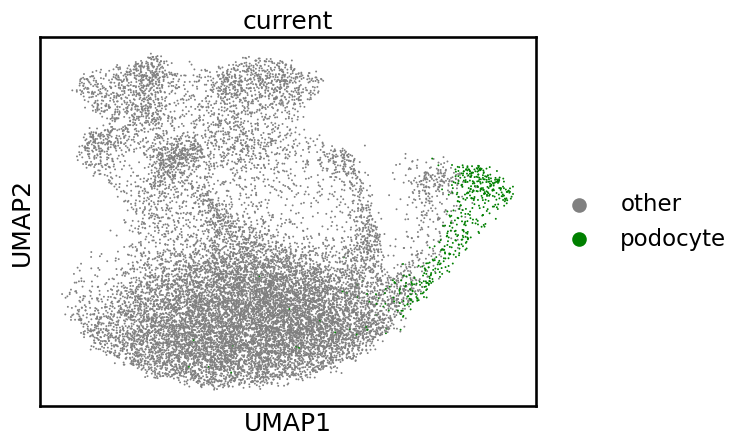

In [6]:
sc.pl.umap(adata, color='current', palette=['grey', 'green'])


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


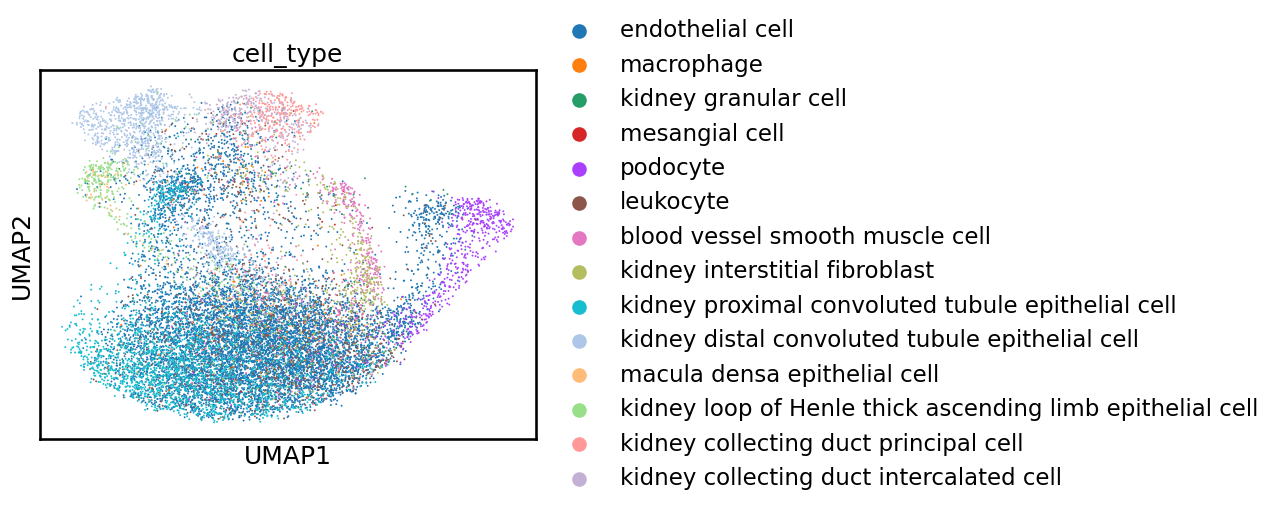

In [7]:
sc.pl.umap(adata, color=['cell_type'])

kidney distal convoluted tubule epithelial cell (1024, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 89.00 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


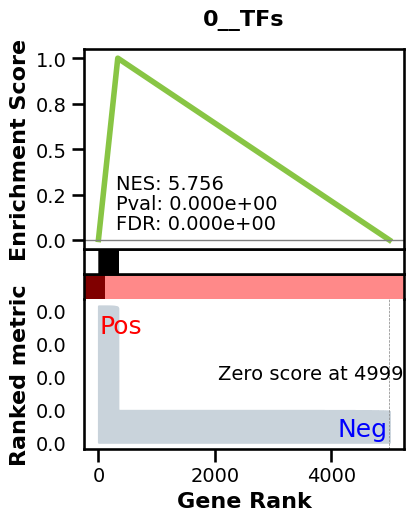

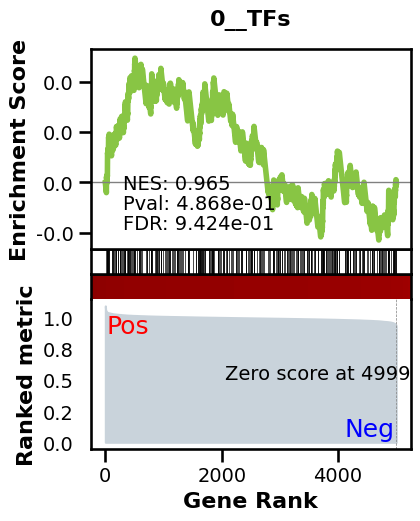

_________________________________________
TF specific enrichment


found some significant results for  11.764705882352942 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3565 genes
intersection pct: 0.713
precision:  0.004538333462130207 
recall:  0.3350622406639004 
random precision: 0.001062203773751226



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 45.59it/s]


  8%|▊         | 10/128 [00:00<00:02, 45.69it/s]


 12%|█▏        | 15/128 [00:00<00:02, 45.85it/s]


 16%|█▌        | 20/128 [00:00<00:02, 45.97it/s]


 20%|█▉        | 25/128 [00:00<00:02, 45.95it/s]


 23%|██▎       | 30/128 [00:00<00:02, 45.95it/s]


 27%|██▋       | 35/128 [00:00<00:02, 46.00it/s]


 31%|███▏      | 40/128 [00:00<00:01, 46.04it/s]


 35%|███▌      | 45/128 [00:00<00:01, 45.97it/s]


 39%|███▉      | 50/128 [00:01<00:01, 46.05it/s]


 43%|████▎     | 55/128 [00:01<00:01, 46.05it/s]


 47%|████▋     | 60/128 [00:01<00:01, 46.02it/s]


 51%|█████     | 65/128 [00:01<00:01, 46.03it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 46.05it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 46.04it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 46.11it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 46.09it/s]


 70%|███████   | 90/128 [00:01<00:00, 46.13it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 45.66it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 45.57it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 45.69it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 45.74it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 45.82it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 45.89it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 45.97it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 45.83it/s]

Average Precision (AP):  0.0028707180369140608
Area Under Precision-Recall Curve (AUPRC):  0.002547500391995076
EPR: 6.134837743453007


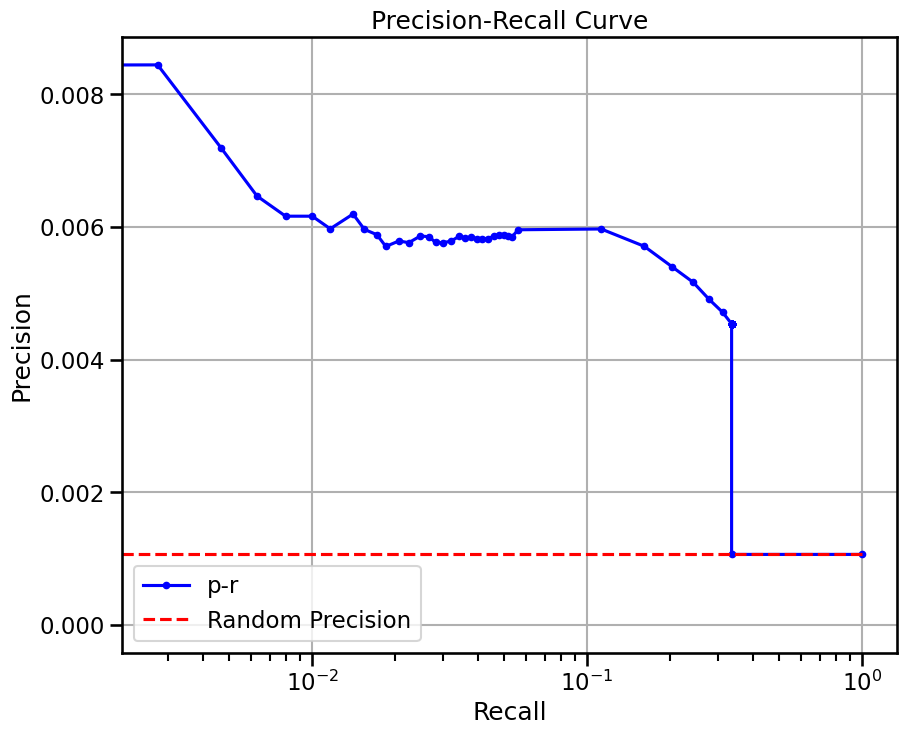

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 326.56 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


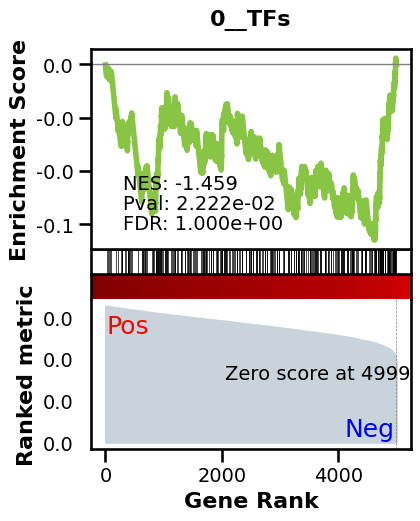

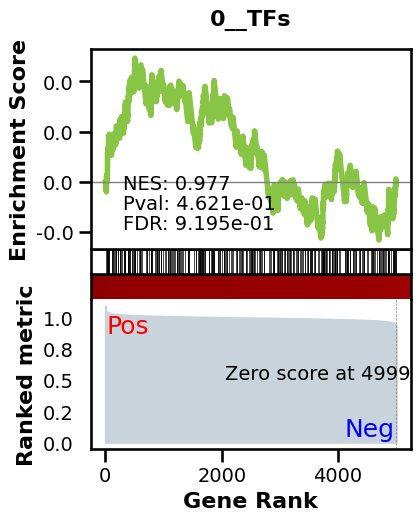

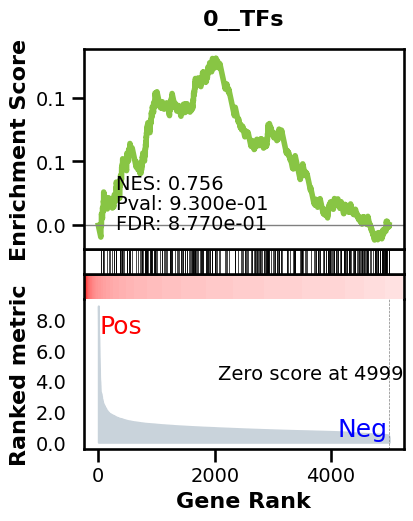

_________________________________________
TF specific enrichment


found some significant results for  2.9411764705882355 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3565 genes
intersection pct: 0.713
precision:  0.0011166915394655035 
recall:  0.7283639596917605 
random precision: 0.001062203773751226



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 43.65it/s]


  8%|▊         | 10/128 [00:00<00:02, 43.63it/s]


 12%|█▏        | 15/128 [00:00<00:02, 43.67it/s]


 16%|█▌        | 20/128 [00:00<00:02, 43.67it/s]


 20%|█▉        | 25/128 [00:00<00:02, 43.59it/s]


 23%|██▎       | 30/128 [00:00<00:02, 43.75it/s]


 27%|██▋       | 35/128 [00:00<00:02, 43.71it/s]


 31%|███▏      | 40/128 [00:00<00:02, 43.66it/s]


 35%|███▌      | 45/128 [00:01<00:01, 43.75it/s]


 39%|███▉      | 50/128 [00:01<00:01, 43.83it/s]


 43%|████▎     | 55/128 [00:01<00:01, 43.85it/s]


 47%|████▋     | 60/128 [00:01<00:01, 43.84it/s]


 51%|█████     | 65/128 [00:01<00:01, 43.76it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 43.79it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 43.76it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 43.69it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 43.71it/s]


 70%|███████   | 90/128 [00:02<00:00, 43.73it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 43.74it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 43.76it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 43.75it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 43.33it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 43.31it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 43.38it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 43.50it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 43.65it/s]

Average Precision (AP):  0.0010780391699438967
Area Under Precision-Recall Curve (AUPRC):  0.0010618845043302383


EPR: 0.9765477850317865


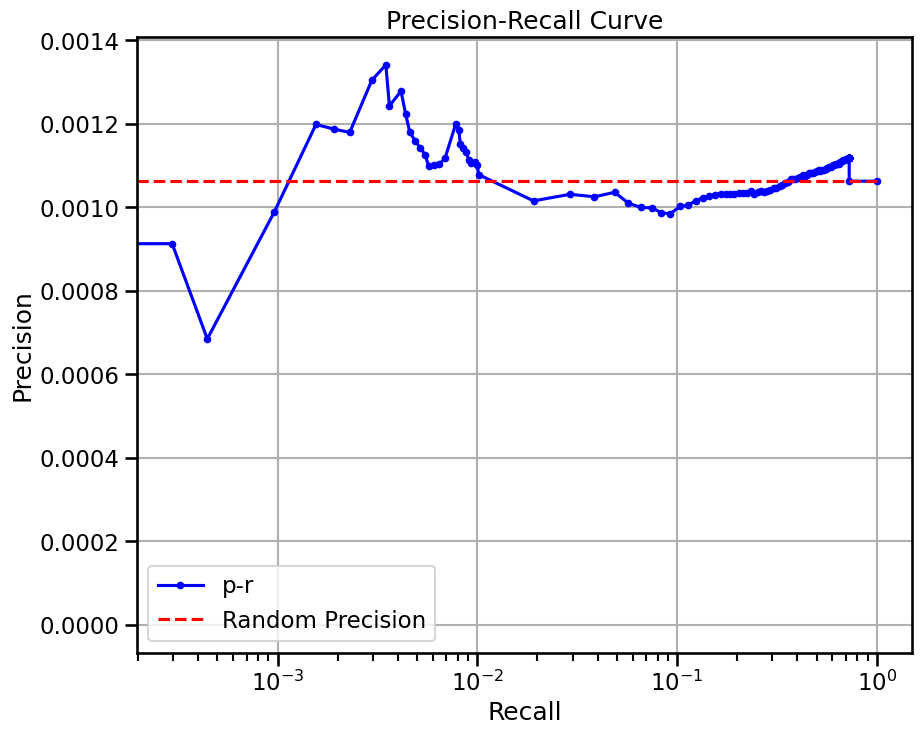

kidney loop of Henle thick ascending limb epithelial cell (388, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 47.48 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


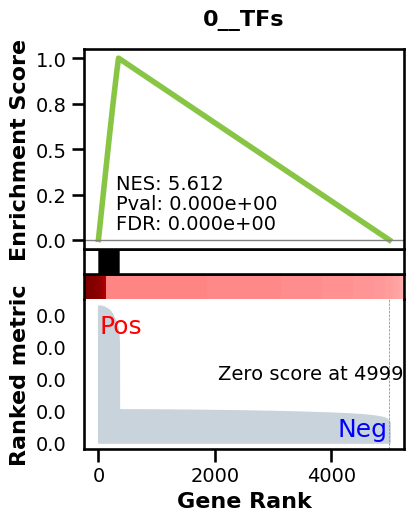

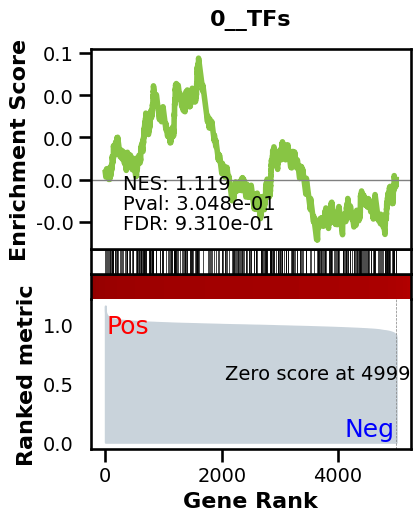

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3514 genes
intersection pct: 0.7028
precision:  0.006254065597884422 
recall:  0.41315244269197354 
random precision: 0.0012121008868434197



  0%|          | 0/128 [00:00<?, ?it/s]


  3%|▎         | 4/128 [00:00<00:03, 38.58it/s]


  6%|▋         | 8/128 [00:00<00:03, 38.42it/s]


  9%|▉         | 12/128 [00:00<00:03, 38.44it/s]


 12%|█▎        | 16/128 [00:00<00:02, 38.41it/s]


 16%|█▌        | 20/128 [00:00<00:02, 38.39it/s]


 19%|█▉        | 24/128 [00:00<00:02, 38.38it/s]


 22%|██▏       | 28/128 [00:00<00:02, 38.34it/s]


 25%|██▌       | 32/128 [00:00<00:02, 38.29it/s]


 28%|██▊       | 36/128 [00:00<00:02, 38.34it/s]


 31%|███▏      | 40/128 [00:01<00:02, 38.33it/s]


 34%|███▍      | 44/128 [00:01<00:02, 38.29it/s]


 38%|███▊      | 48/128 [00:01<00:02, 38.31it/s]


 41%|████      | 52/128 [00:01<00:01, 38.31it/s]


 44%|████▍     | 56/128 [00:01<00:01, 38.32it/s]


 47%|████▋     | 60/128 [00:01<00:01, 38.27it/s]


 50%|█████     | 64/128 [00:01<00:01, 38.25it/s]


 53%|█████▎    | 68/128 [00:01<00:01, 38.28it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 38.32it/s]


 59%|█████▉    | 76/128 [00:01<00:01, 38.35it/s]


 62%|██████▎   | 80/128 [00:02<00:01, 38.34it/s]


 66%|██████▌   | 84/128 [00:02<00:01, 38.36it/s]


 69%|██████▉   | 88/128 [00:02<00:01, 38.31it/s]


 72%|███████▏  | 92/128 [00:02<00:00, 38.28it/s]


 75%|███████▌  | 96/128 [00:02<00:00, 38.27it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 38.25it/s]


 81%|████████▏ | 104/128 [00:02<00:00, 38.25it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 38.31it/s]


 88%|████████▊ | 112/128 [00:02<00:00, 38.30it/s]


 91%|█████████ | 116/128 [00:03<00:00, 38.29it/s]


 94%|█████████▍| 120/128 [00:03<00:00, 38.27it/s]


 97%|█████████▋| 124/128 [00:03<00:00, 38.24it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:03<00:00, 38.24it/s]


100%|██████████| 128/128 [00:03<00:00, 38.30it/s]

Average Precision (AP):  0.003809814710245155
Area Under Precision-Recall Curve (AUPRC):  0.003315020337839223
EPR: 4.391535177422592


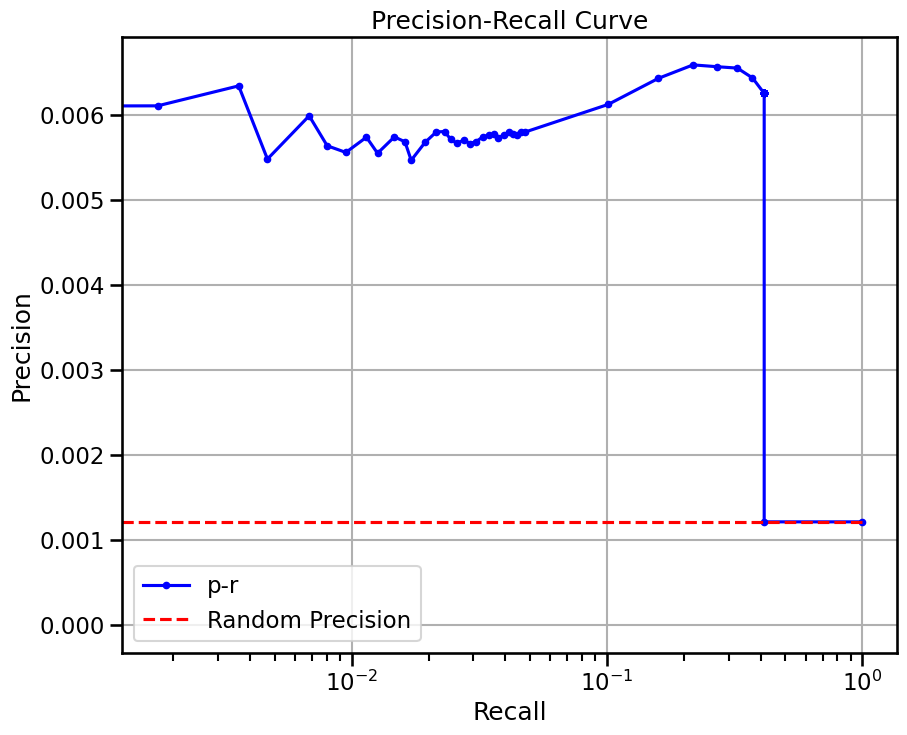

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 82.48 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


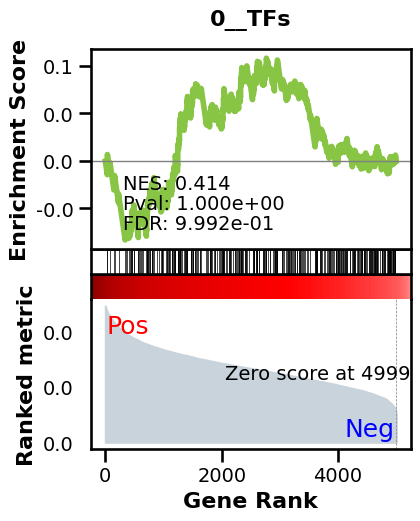

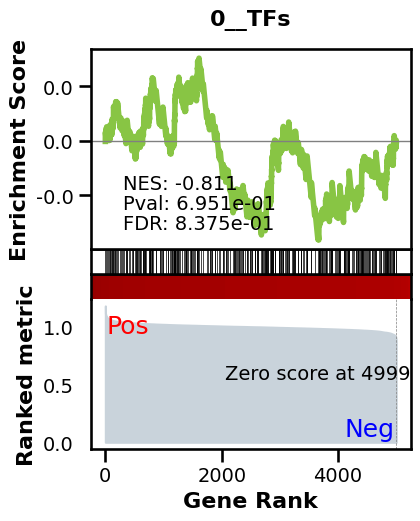

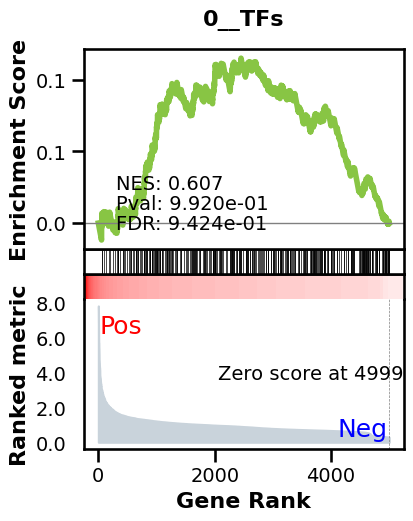

_________________________________________
TF specific enrichment


found some significant results for  2.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3514 genes
intersection pct: 0.7028
precision:  0.0012858000587873915 
recall:  0.37011294526498695 
random precision: 0.0012121008868434197



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 42.47it/s]


  8%|▊         | 10/128 [00:00<00:02, 42.46it/s]


 12%|█▏        | 15/128 [00:00<00:02, 42.57it/s]


 16%|█▌        | 20/128 [00:00<00:02, 42.65it/s]


 20%|█▉        | 25/128 [00:00<00:02, 42.72it/s]


 23%|██▎       | 30/128 [00:00<00:02, 42.71it/s]


 27%|██▋       | 35/128 [00:00<00:02, 42.62it/s]


 31%|███▏      | 40/128 [00:00<00:02, 42.69it/s]


 35%|███▌      | 45/128 [00:01<00:01, 42.63it/s]


 39%|███▉      | 50/128 [00:01<00:01, 42.69it/s]


 43%|████▎     | 55/128 [00:01<00:01, 42.71it/s]


 47%|████▋     | 60/128 [00:01<00:01, 42.72it/s]


 51%|█████     | 65/128 [00:01<00:01, 42.66it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 42.73it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 42.77it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 42.77it/s]


 66%|██████▋   | 85/128 [00:01<00:01, 42.71it/s]


 70%|███████   | 90/128 [00:02<00:00, 42.74it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 42.75it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 42.73it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 42.67it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 42.72it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 42.76it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 42.84it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 42.83it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 42.70it/s]

Average Precision (AP):  0.00122348866869987
Area Under Precision-Recall Curve (AUPRC):  0.0011863971406306825
EPR: 0.6610997570772749


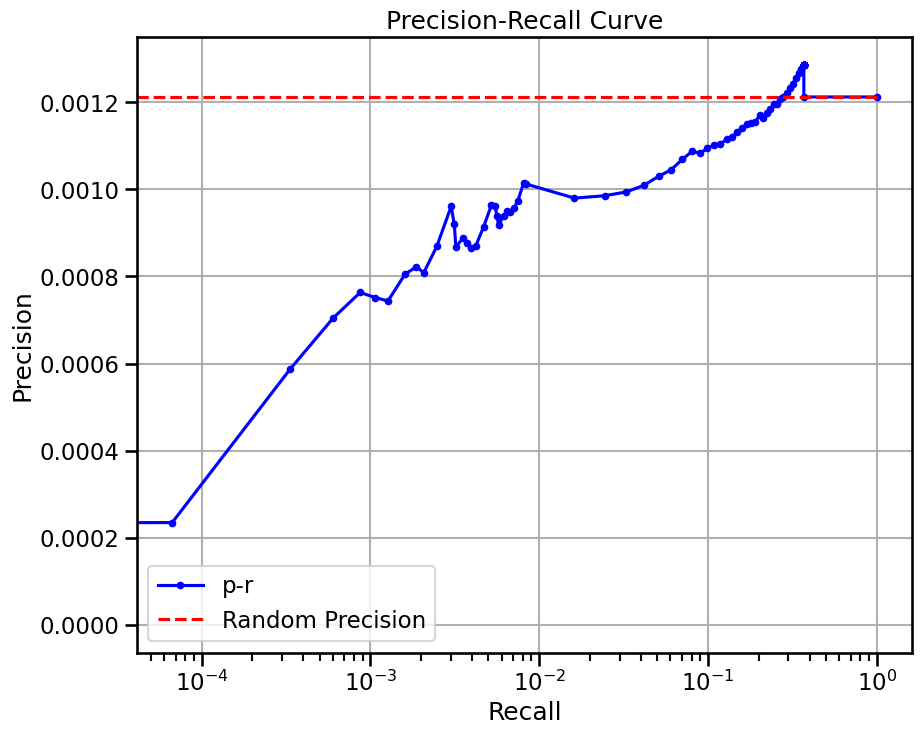

kidney collecting duct principal cell (455, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 53.32 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


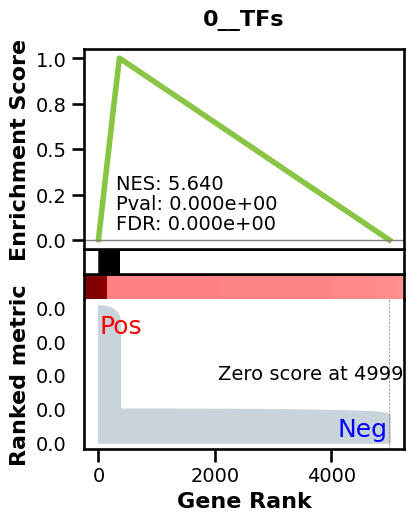

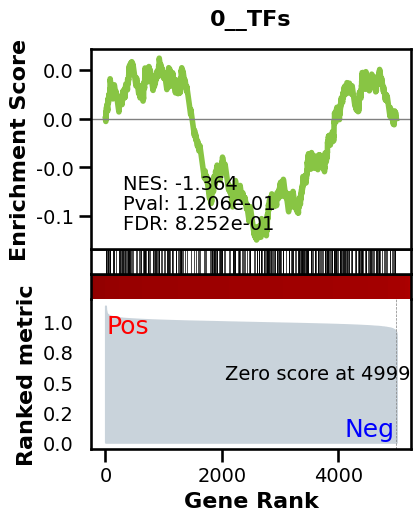

_________________________________________
TF specific enrichment


found some significant results for  4.285714285714286 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3594 genes
intersection pct: 0.7188
precision:  0.007067619132943644 
recall:  0.43958605788366406 
random precision: 0.0013619352909207464



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 42.36it/s]


  8%|▊         | 10/128 [00:00<00:02, 42.35it/s]


 12%|█▏        | 15/128 [00:00<00:02, 42.25it/s]


 16%|█▌        | 20/128 [00:00<00:02, 42.25it/s]


 20%|█▉        | 25/128 [00:00<00:02, 42.30it/s]


 23%|██▎       | 30/128 [00:00<00:02, 42.31it/s]


 27%|██▋       | 35/128 [00:00<00:02, 42.32it/s]


 31%|███▏      | 40/128 [00:00<00:02, 42.36it/s]


 35%|███▌      | 45/128 [00:01<00:01, 42.30it/s]


 39%|███▉      | 50/128 [00:01<00:01, 42.34it/s]


 43%|████▎     | 55/128 [00:01<00:01, 42.34it/s]


 47%|████▋     | 60/128 [00:01<00:01, 42.32it/s]


 51%|█████     | 65/128 [00:01<00:01, 42.35it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 42.32it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 42.31it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 42.34it/s]


 66%|██████▋   | 85/128 [00:02<00:01, 42.33it/s]


 70%|███████   | 90/128 [00:02<00:00, 42.35it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 42.36it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 42.41it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 42.31it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 42.24it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 42.31it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 42.41it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 42.39it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:03<00:00, 42.32it/s]

Average Precision (AP):  0.005450542568636438
Area Under Precision-Recall Curve (AUPRC):  0.004855586314815209
EPR: 9.568784102075561


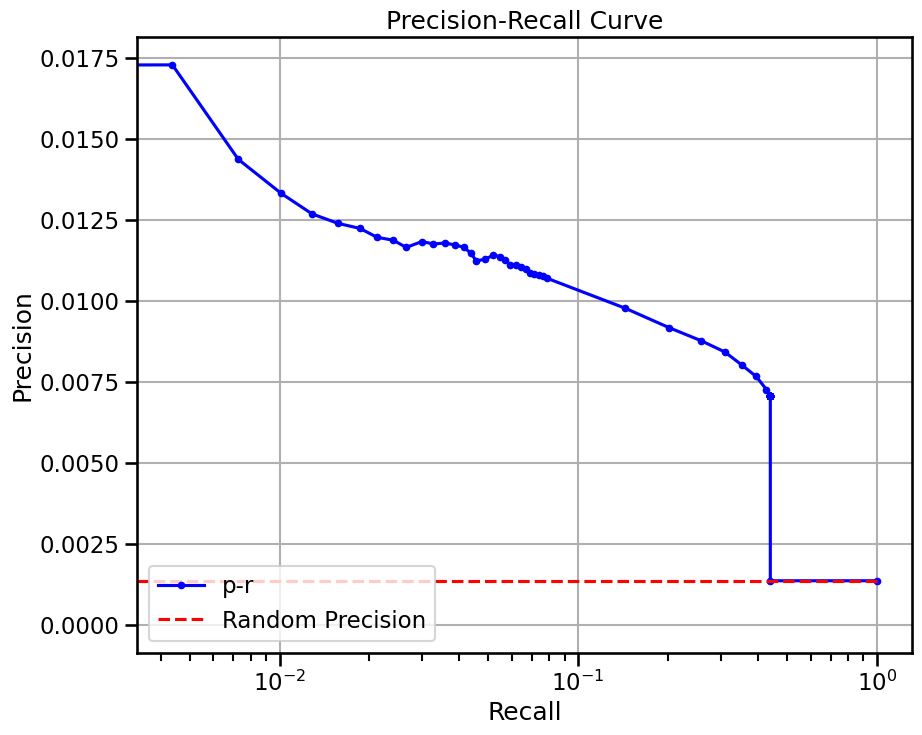

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 115.88 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


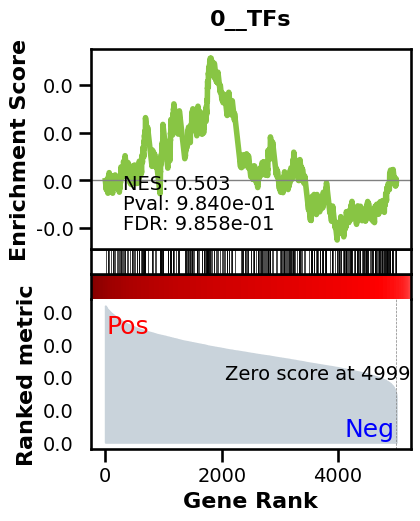

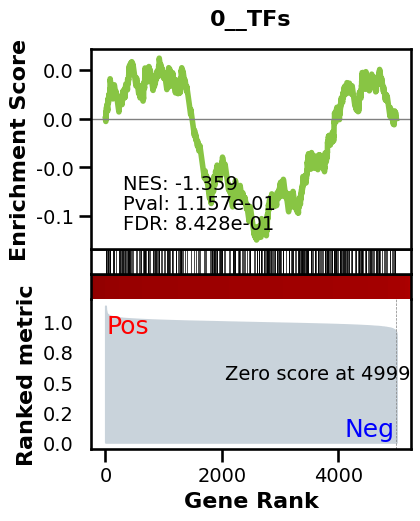

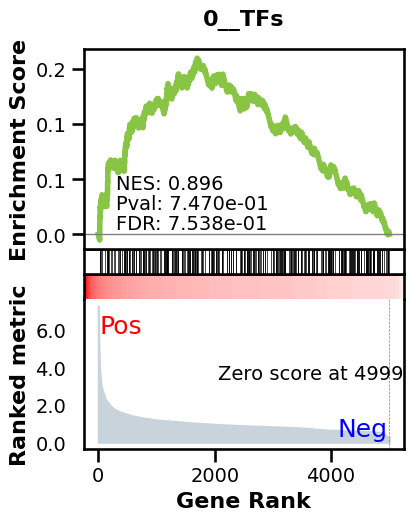

_________________________________________
TF specific enrichment


found some significant results for  2.857142857142857 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3594 genes
intersection pct: 0.7188
precision:  0.0015257592716537837 
recall:  0.5043498038323762 
random precision: 0.0013619352909207464



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 44.45it/s]


  8%|▊         | 10/128 [00:00<00:02, 44.55it/s]


 12%|█▏        | 15/128 [00:00<00:02, 44.55it/s]


 16%|█▌        | 20/128 [00:00<00:02, 44.51it/s]


 20%|█▉        | 25/128 [00:00<00:02, 44.54it/s]


 23%|██▎       | 30/128 [00:00<00:02, 44.49it/s]


 27%|██▋       | 35/128 [00:00<00:02, 44.42it/s]


 31%|███▏      | 40/128 [00:00<00:01, 44.40it/s]


 35%|███▌      | 45/128 [00:01<00:01, 44.46it/s]


 39%|███▉      | 50/128 [00:01<00:01, 44.46it/s]


 43%|████▎     | 55/128 [00:01<00:01, 44.52it/s]


 47%|████▋     | 60/128 [00:01<00:01, 44.52it/s]


 51%|█████     | 65/128 [00:01<00:01, 44.51it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 44.55it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 44.54it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 44.54it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 44.50it/s]


 70%|███████   | 90/128 [00:02<00:00, 44.49it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 44.53it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 44.57it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 44.39it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 44.36it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 44.37it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 44.40it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 44.38it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 44.46it/s]

Average Precision (AP):  0.0014686941896202314
Area Under Precision-Recall Curve (AUPRC):  0.0014253251029675501


EPR: 1.5050491968998292


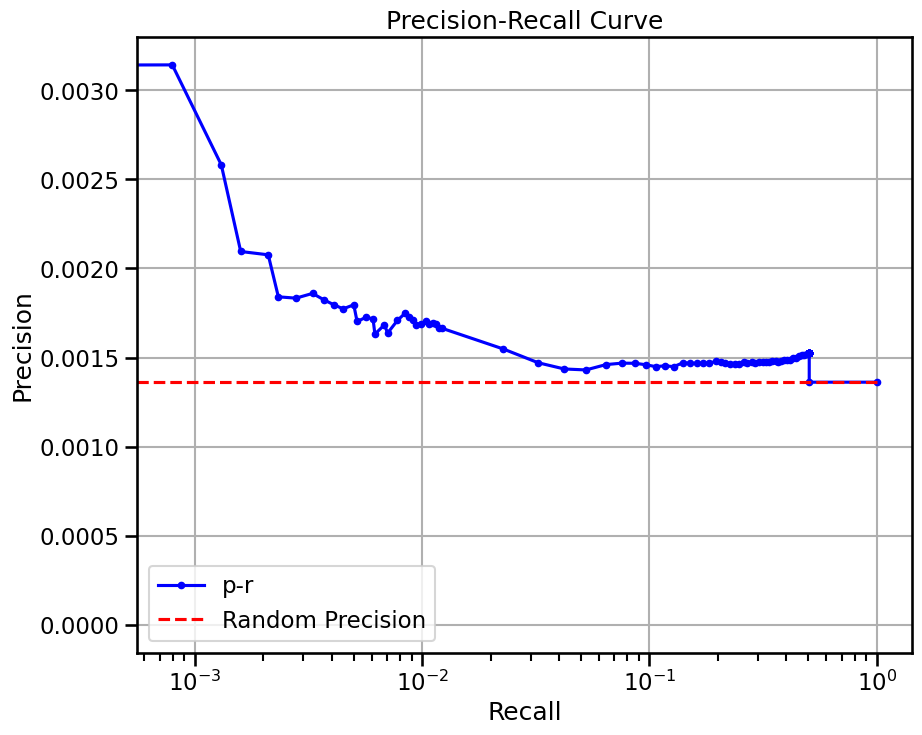

mesangial cell (10, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 23.06 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


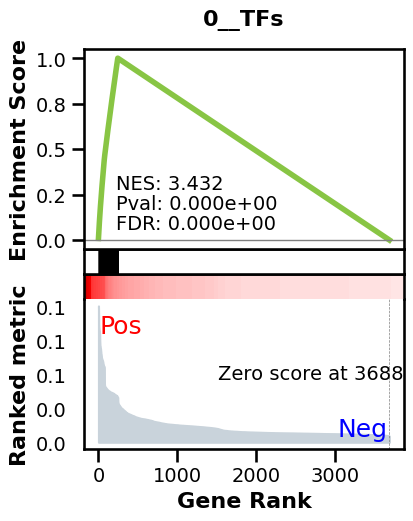

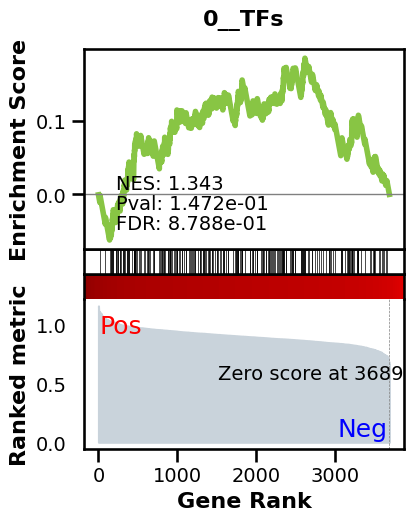

_________________________________________
TF specific enrichment


found some significant results for  4.761904761904762 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2670 genes
intersection pct: 0.7235772357723578
precision:  0.011003549302586936 
recall:  0.17755078618156778 
random precision: 0.0012226661221992553



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 65.08it/s]


 11%|█         | 14/128 [00:00<00:01, 65.31it/s]


 16%|█▋        | 21/128 [00:00<00:01, 65.29it/s]


 22%|██▏       | 28/128 [00:00<00:01, 65.40it/s]


 27%|██▋       | 35/128 [00:00<00:01, 65.34it/s]


 33%|███▎      | 42/128 [00:00<00:01, 65.00it/s]


 38%|███▊      | 49/128 [00:00<00:01, 52.41it/s]


 44%|████▍     | 56/128 [00:00<00:01, 55.80it/s]


 49%|████▉     | 63/128 [00:01<00:01, 58.32it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 60.15it/s]


 60%|██████    | 77/128 [00:01<00:00, 61.42it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 62.44it/s]


 71%|███████   | 91/128 [00:01<00:00, 63.08it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 63.54it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 63.91it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 64.19it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 64.31it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 64.39it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 62.34it/s]

Average Precision (AP):  0.003052972507823877
Area Under Precision-Recall Curve (AUPRC):  0.002756294390492758
EPR: 6.082031007442918


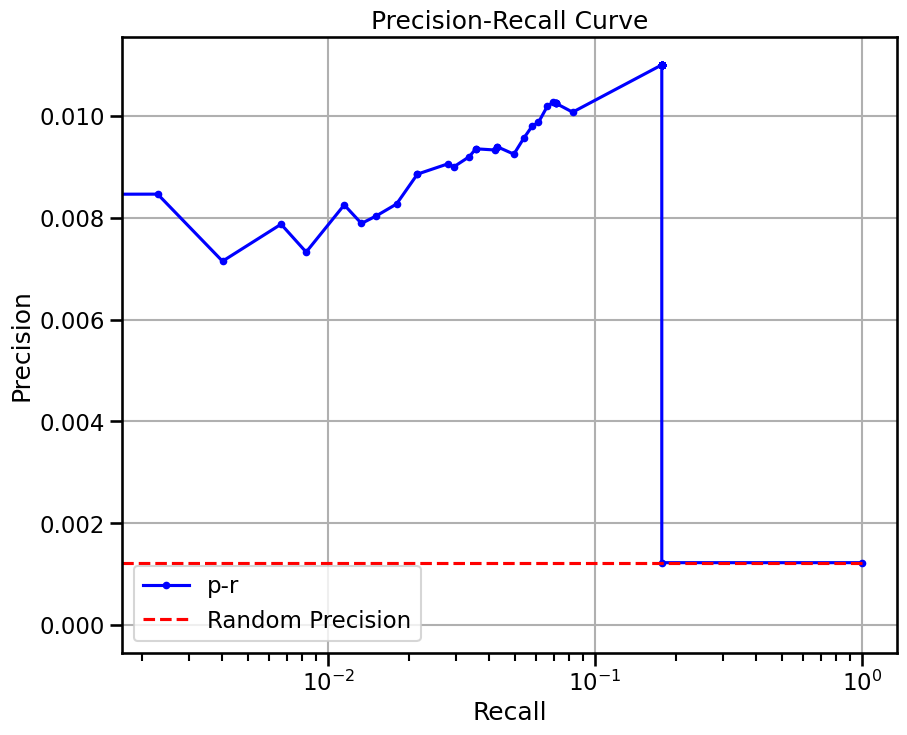

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 25.47 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


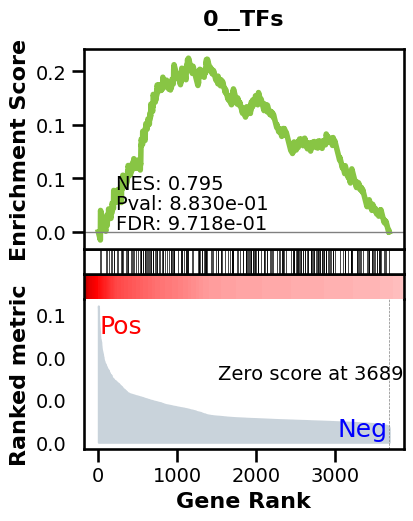

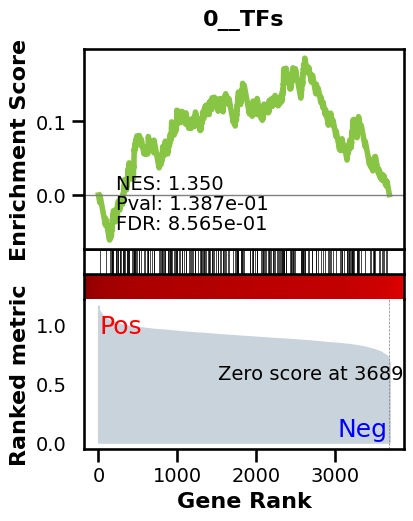

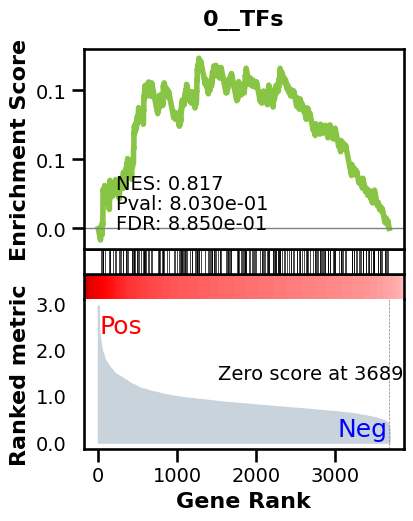

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2670 genes
intersection pct: 0.7235772357723578
precision:  0.001644833460612113 
recall:  0.03213588890164123 
random precision: 0.0012226661221992553



  0%|          | 0/128 [00:00<?, ?it/s]


  7%|▋         | 9/128 [00:00<00:01, 80.42it/s]


 14%|█▍        | 18/128 [00:00<00:01, 80.38it/s]


 21%|██        | 27/128 [00:00<00:01, 80.37it/s]


 28%|██▊       | 36/128 [00:00<00:01, 80.49it/s]


 35%|███▌      | 45/128 [00:00<00:01, 80.48it/s]


 42%|████▏     | 54/128 [00:00<00:00, 80.50it/s]


 49%|████▉     | 63/128 [00:00<00:00, 80.64it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 80.58it/s]


 63%|██████▎   | 81/128 [00:01<00:00, 80.65it/s]


 70%|███████   | 90/128 [00:01<00:00, 80.67it/s]


 77%|███████▋  | 99/128 [00:01<00:00, 80.58it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 80.63it/s]


 91%|█████████▏| 117/128 [00:01<00:00, 80.54it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 80.52it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 80.50it/s]

Average Precision (AP):  0.001126457692745319
Area Under Precision-Recall Curve (AUPRC):  0.0012262439444016642
EPR: 0.5626146910095808


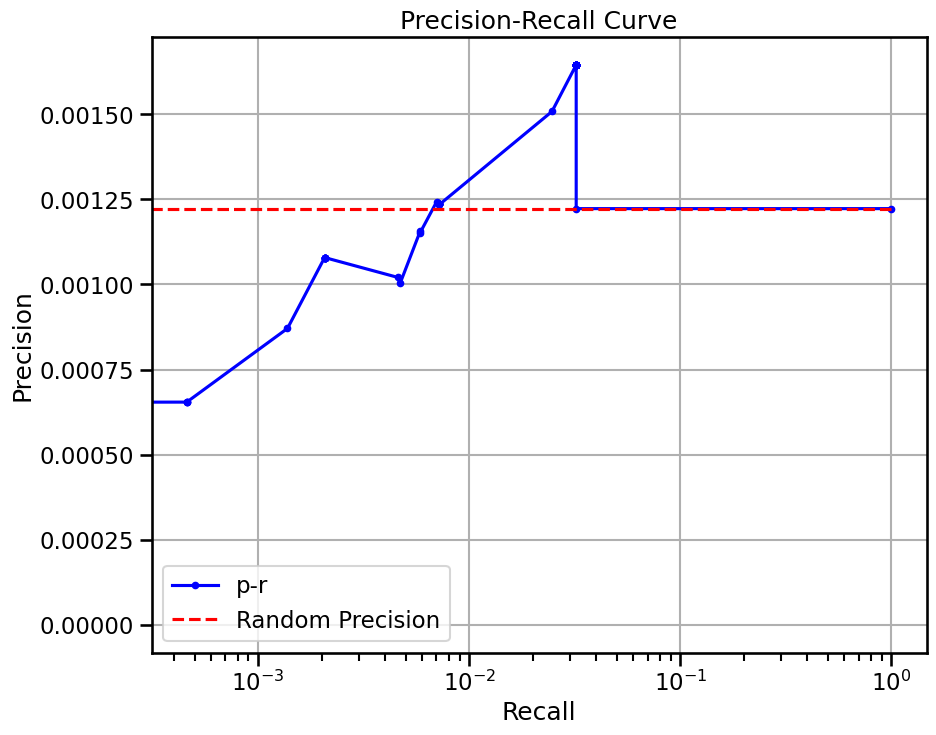

blood vessel smooth muscle cell (462, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 47.32 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


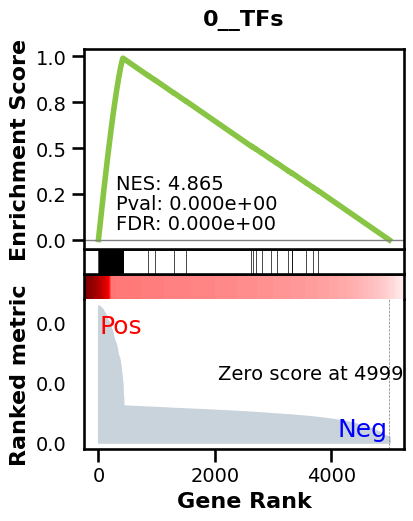

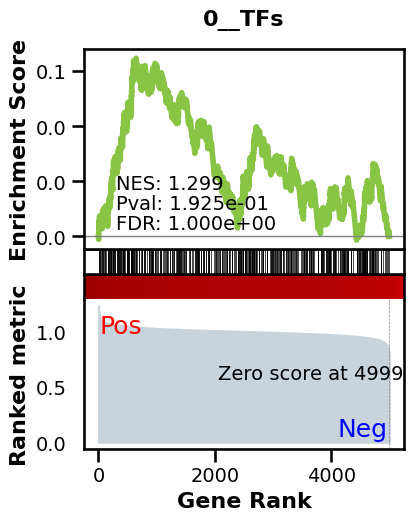

_________________________________________
TF specific enrichment


found some significant results for  5.357142857142857 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3625 genes
intersection pct: 0.725
precision:  0.008714517457139899 
recall:  0.40232187571135897 
random precision: 0.0016719951282636828



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 42.82it/s]


  8%|▊         | 10/128 [00:00<00:02, 42.78it/s]


 12%|█▏        | 15/128 [00:00<00:02, 42.75it/s]


 16%|█▌        | 20/128 [00:00<00:02, 42.82it/s]


 20%|█▉        | 25/128 [00:00<00:02, 42.86it/s]


 23%|██▎       | 30/128 [00:00<00:02, 42.83it/s]


 27%|██▋       | 35/128 [00:00<00:02, 42.85it/s]


 31%|███▏      | 40/128 [00:00<00:02, 42.83it/s]


 35%|███▌      | 45/128 [00:01<00:01, 42.85it/s]


 39%|███▉      | 50/128 [00:01<00:01, 42.82it/s]


 43%|████▎     | 55/128 [00:01<00:01, 42.81it/s]


 47%|████▋     | 60/128 [00:01<00:01, 42.84it/s]


 51%|█████     | 65/128 [00:01<00:01, 42.85it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 42.84it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 42.83it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 42.85it/s]


 66%|██████▋   | 85/128 [00:01<00:01, 42.88it/s]


 70%|███████   | 90/128 [00:02<00:00, 42.85it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 42.85it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 42.83it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 42.85it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 42.87it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 42.87it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 42.85it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 42.87it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 42.83it/s]

Average Precision (AP):  0.0058099222746759525
Area Under Precision-Recall Curve (AUPRC):  0.005234852648171202
EPR: 6.9701780133029505


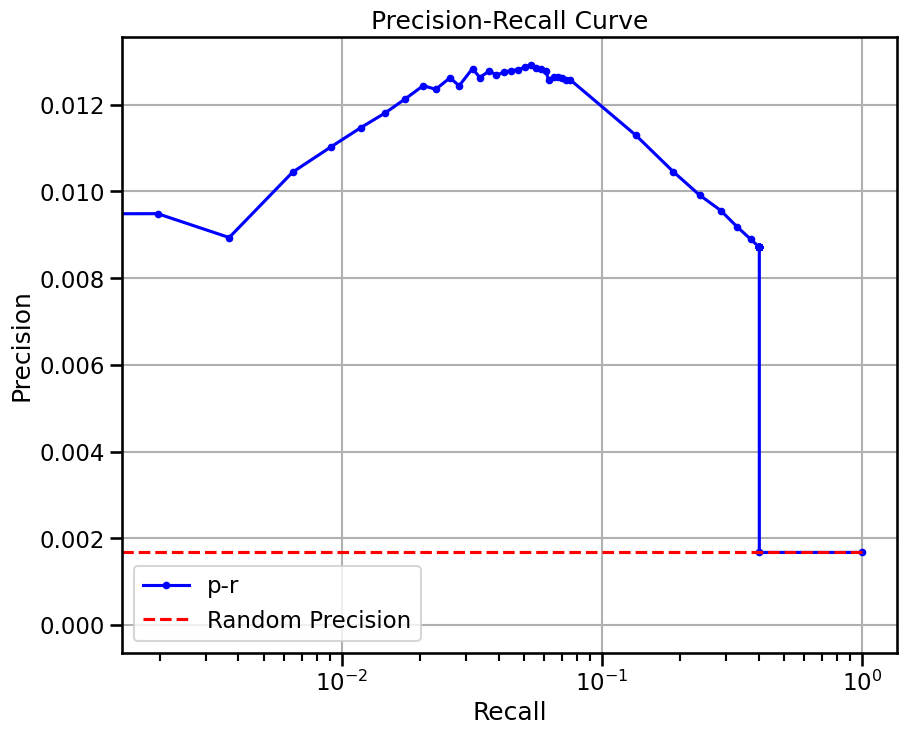

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 73.60 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


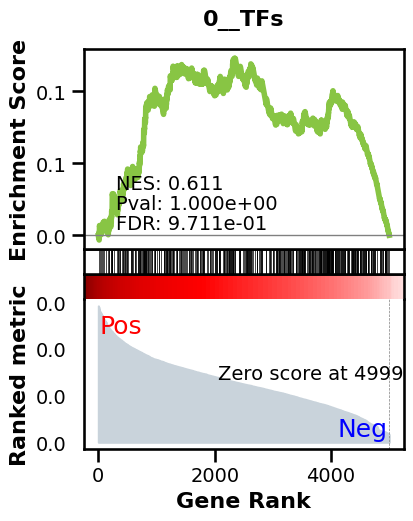

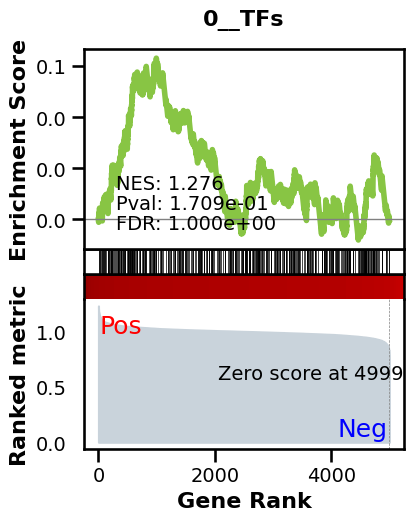

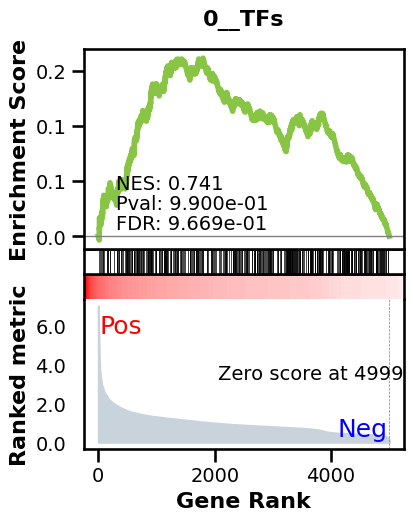

_________________________________________
TF specific enrichment


found some significant results for  3.5714285714285716 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3625 genes
intersection pct: 0.725
precision:  0.0022016859657930563 
recall:  0.3268381516048259 
random precision: 0.0016719951282636828



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 41.37it/s]


  8%|▊         | 10/128 [00:00<00:02, 41.17it/s]


 12%|█▏        | 15/128 [00:00<00:02, 41.25it/s]


 16%|█▌        | 20/128 [00:00<00:02, 41.35it/s]


 20%|█▉        | 25/128 [00:00<00:02, 41.14it/s]


 23%|██▎       | 30/128 [00:00<00:02, 41.22it/s]


 27%|██▋       | 35/128 [00:00<00:02, 41.22it/s]


 31%|███▏      | 40/128 [00:00<00:02, 41.25it/s]


 35%|███▌      | 45/128 [00:01<00:02, 41.32it/s]


 39%|███▉      | 50/128 [00:01<00:01, 41.21it/s]


 43%|████▎     | 55/128 [00:01<00:01, 41.29it/s]


 47%|████▋     | 60/128 [00:01<00:01, 41.23it/s]


 51%|█████     | 65/128 [00:01<00:01, 41.28it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 41.36it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 41.36it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 41.36it/s]


 66%|██████▋   | 85/128 [00:02<00:01, 41.36it/s]


 70%|███████   | 90/128 [00:02<00:00, 41.29it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 41.31it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 41.33it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 41.37it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 41.36it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 41.34it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 41.39it/s]


 98%|█████████▊| 125/128 [00:03<00:00, 41.47it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:03<00:00, 41.30it/s]

Average Precision (AP):  0.0018693614291279612
Area Under Precision-Recall Curve (AUPRC):  0.0018011654210655804
EPR: 0.7890882466884633


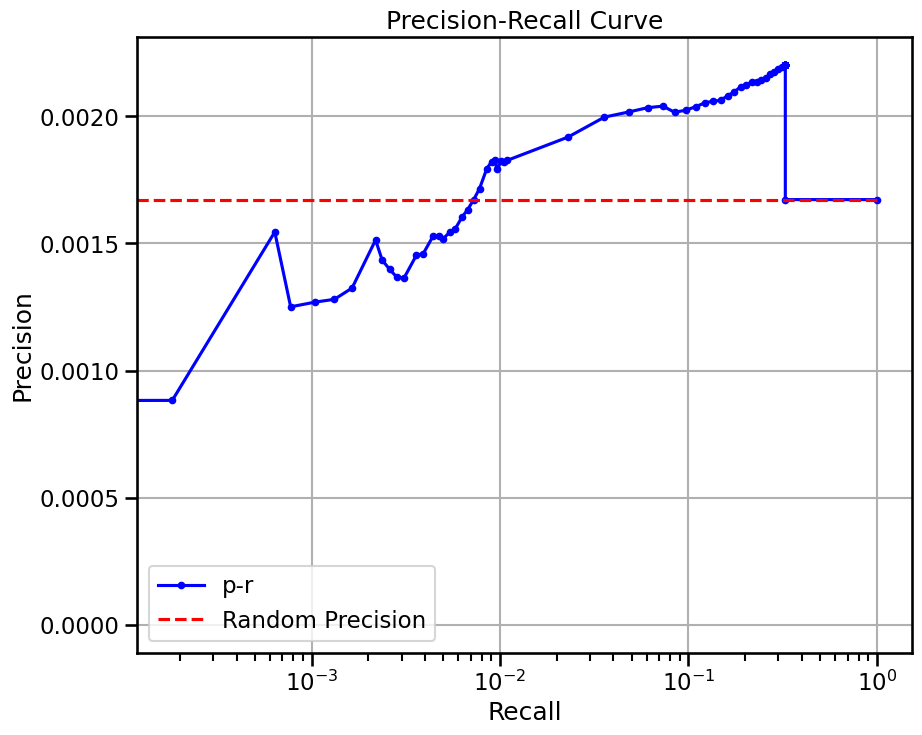

podocyte (518, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 52.11 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


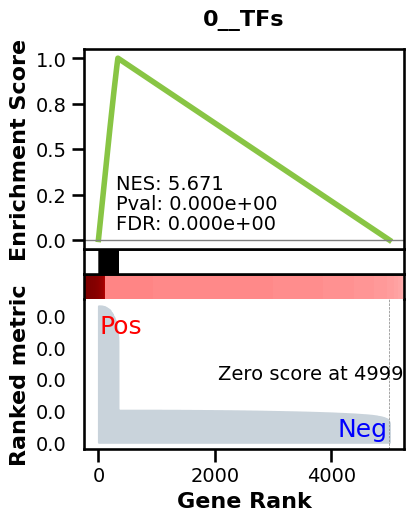

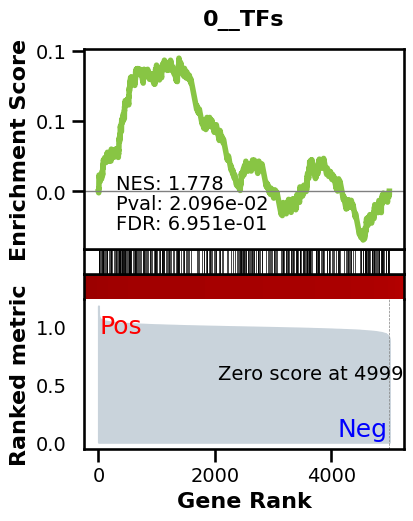

_________________________________________
TF specific enrichment


found some significant results for  6.382978723404255 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3603 genes
intersection pct: 0.7206
precision:  0.008512402090064281 
recall:  0.43673552250926256 
random precision: 0.001518183918238287



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 43.69it/s]


  8%|▊         | 10/128 [00:00<00:02, 42.93it/s]


 12%|█▏        | 15/128 [00:00<00:02, 43.27it/s]


 16%|█▌        | 20/128 [00:00<00:02, 43.51it/s]


 20%|█▉        | 25/128 [00:00<00:02, 43.64it/s]


 23%|██▎       | 30/128 [00:00<00:02, 43.72it/s]


 27%|██▋       | 35/128 [00:00<00:02, 43.78it/s]


 31%|███▏      | 40/128 [00:00<00:02, 43.81it/s]


 35%|███▌      | 45/128 [00:01<00:01, 43.83it/s]


 39%|███▉      | 50/128 [00:01<00:01, 43.87it/s]


 43%|████▎     | 55/128 [00:01<00:01, 43.92it/s]


 47%|████▋     | 60/128 [00:01<00:01, 43.96it/s]


 51%|█████     | 65/128 [00:01<00:01, 43.94it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 43.96it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 43.94it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 43.91it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 43.91it/s]


 70%|███████   | 90/128 [00:02<00:00, 43.87it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 43.89it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 43.91it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 43.87it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 43.87it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 43.88it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 43.86it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 43.87it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 43.81it/s]

Average Precision (AP):  0.00532487136696206
Area Under Precision-Recall Curve (AUPRC):  0.004735870932033665
EPR: 6.872767808501514


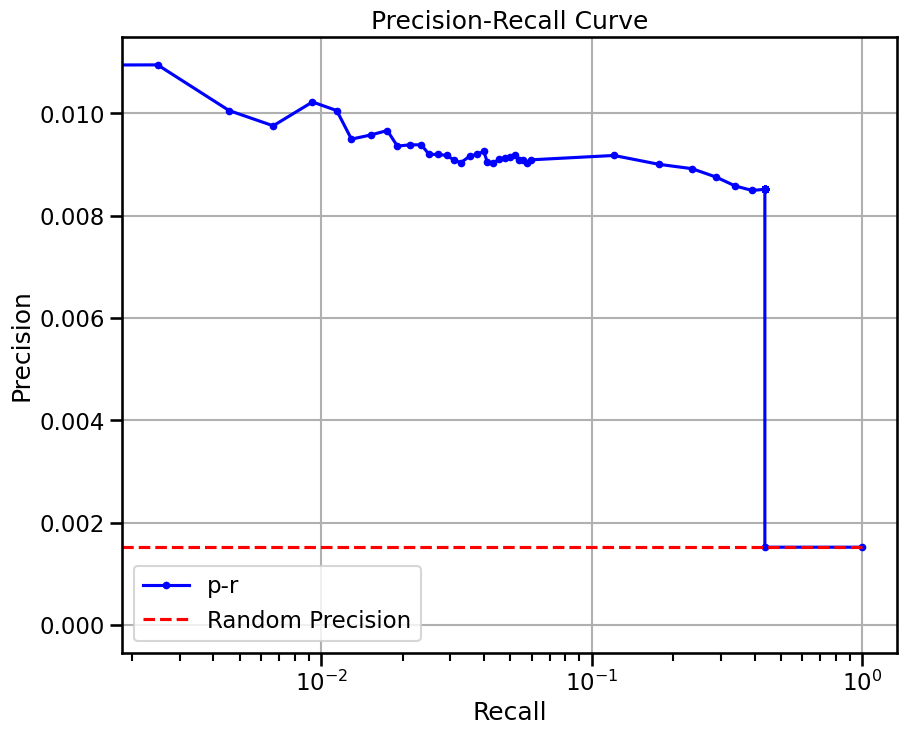

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 120.25 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


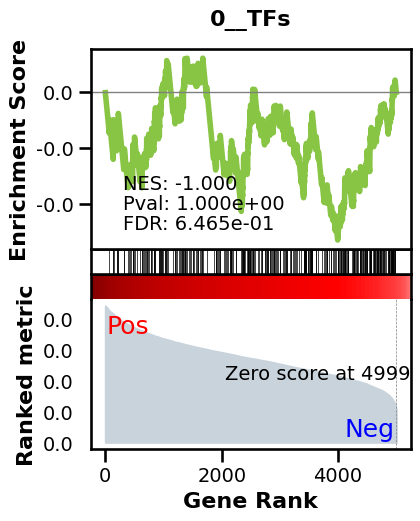

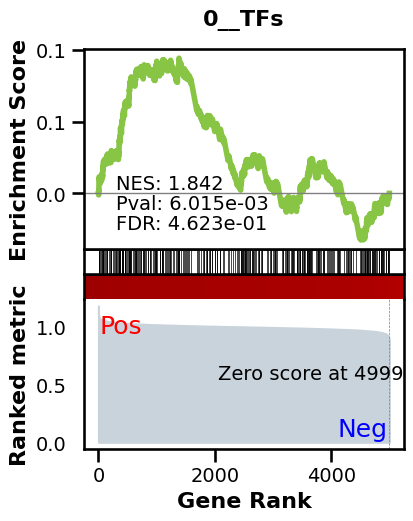

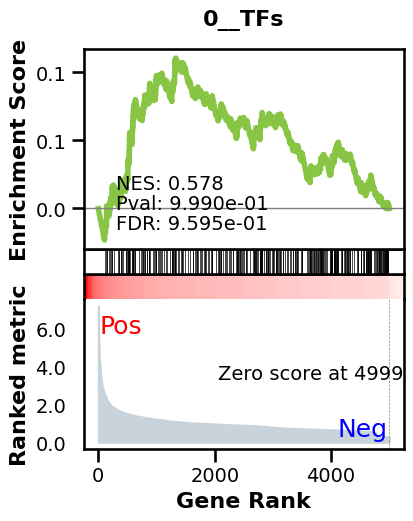

_________________________________________
TF specific enrichment


found some significant results for  6.382978723404255 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3603 genes
intersection pct: 0.7206
precision:  0.0016639758806314584 
recall:  0.45378876313251787 
random precision: 0.001518183918238287



  0%|          | 0/128 [00:00<?, ?it/s]


  3%|▎         | 4/128 [00:00<00:03, 35.66it/s]


  6%|▋         | 8/128 [00:00<00:03, 35.54it/s]


  9%|▉         | 12/128 [00:00<00:03, 35.57it/s]


 12%|█▎        | 16/128 [00:00<00:03, 35.53it/s]


 16%|█▌        | 20/128 [00:00<00:03, 35.44it/s]


 19%|█▉        | 24/128 [00:00<00:02, 35.39it/s]


 22%|██▏       | 28/128 [00:00<00:02, 35.34it/s]


 25%|██▌       | 32/128 [00:00<00:02, 35.11it/s]


 28%|██▊       | 36/128 [00:01<00:02, 35.13it/s]


 31%|███▏      | 40/128 [00:01<00:02, 35.04it/s]


 34%|███▍      | 44/128 [00:01<00:02, 34.99it/s]


 38%|███▊      | 48/128 [00:01<00:02, 34.98it/s]


 41%|████      | 52/128 [00:01<00:02, 34.98it/s]


 44%|████▍     | 56/128 [00:01<00:02, 34.97it/s]


 47%|████▋     | 60/128 [00:01<00:01, 34.97it/s]


 50%|█████     | 64/128 [00:01<00:01, 35.03it/s]


 53%|█████▎    | 68/128 [00:01<00:01, 35.01it/s]


 56%|█████▋    | 72/128 [00:02<00:01, 35.13it/s]


 59%|█████▉    | 76/128 [00:02<00:01, 35.14it/s]


 62%|██████▎   | 80/128 [00:02<00:01, 35.14it/s]


 66%|██████▌   | 84/128 [00:02<00:01, 35.07it/s]


 69%|██████▉   | 88/128 [00:02<00:01, 35.12it/s]


 72%|███████▏  | 92/128 [00:02<00:01, 35.09it/s]


 75%|███████▌  | 96/128 [00:02<00:00, 35.08it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 35.08it/s]


 81%|████████▏ | 104/128 [00:02<00:00, 35.11it/s]


 84%|████████▍ | 108/128 [00:03<00:00, 35.11it/s]


 88%|████████▊ | 112/128 [00:03<00:00, 35.11it/s]


 91%|█████████ | 116/128 [00:03<00:00, 35.13it/s]


 94%|█████████▍| 120/128 [00:03<00:00, 35.12it/s]


 97%|█████████▋| 124/128 [00:03<00:00, 35.20it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:03<00:00, 35.02it/s]


100%|██████████| 128/128 [00:03<00:00, 35.12it/s]

Average Precision (AP):  0.0015890446619182639
Area Under Precision-Recall Curve (AUPRC):  0.0015330721477419948
EPR: 0.6010208768804635


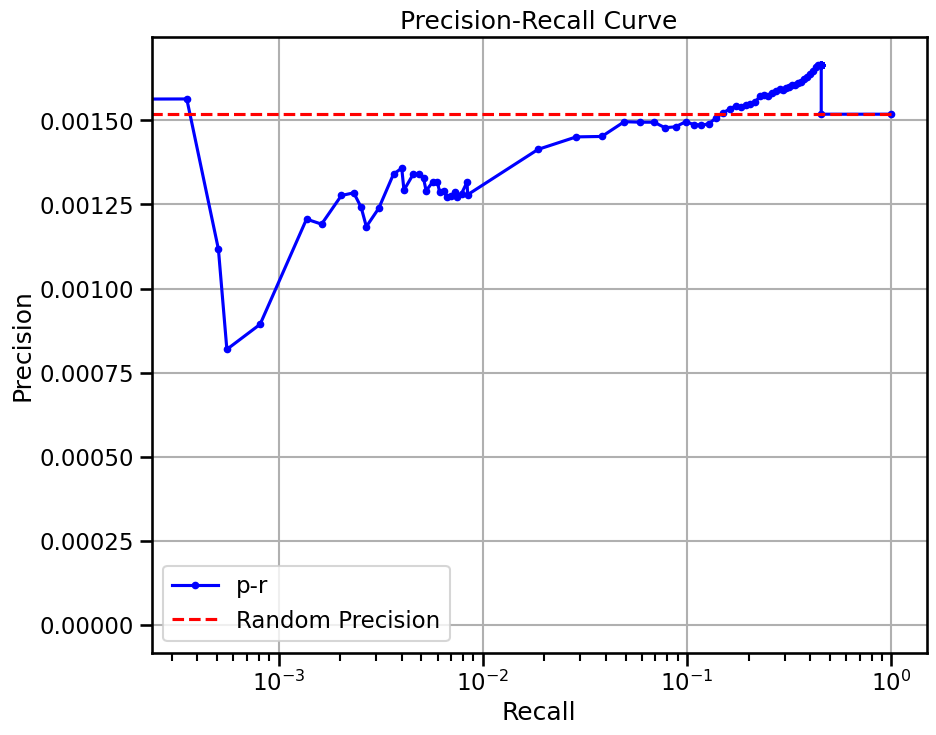

macrophage (88, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 34.02 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


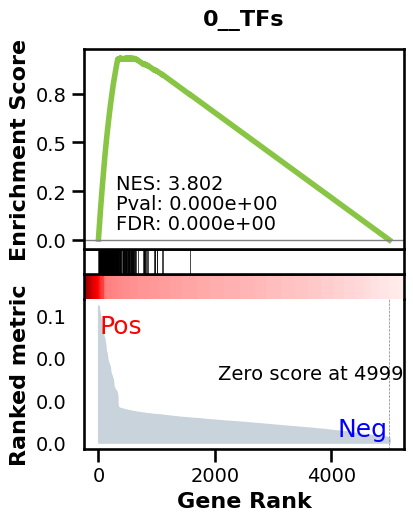

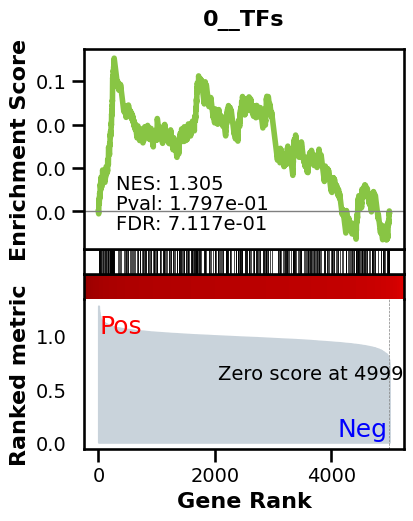

_________________________________________
TF specific enrichment


found some significant results for  4.878048780487805 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3553 genes
intersection pct: 0.7106
precision:  0.009253374912953114 
recall:  0.3142058233542034 
random precision: 0.0013035393259851465



  0%|          | 0/128 [00:00<?, ?it/s]


  3%|▎         | 4/128 [00:00<00:03, 36.88it/s]


  6%|▋         | 8/128 [00:00<00:03, 36.82it/s]


  9%|▉         | 12/128 [00:00<00:03, 36.83it/s]


 12%|█▎        | 16/128 [00:00<00:03, 36.82it/s]


 16%|█▌        | 20/128 [00:00<00:02, 36.80it/s]


 19%|█▉        | 24/128 [00:00<00:02, 36.75it/s]


 22%|██▏       | 28/128 [00:00<00:02, 36.77it/s]


 25%|██▌       | 32/128 [00:00<00:02, 36.77it/s]


 28%|██▊       | 36/128 [00:00<00:02, 36.77it/s]


 31%|███▏      | 40/128 [00:01<00:02, 36.77it/s]


 34%|███▍      | 44/128 [00:01<00:02, 36.81it/s]


 38%|███▊      | 48/128 [00:01<00:02, 36.78it/s]


 41%|████      | 52/128 [00:01<00:02, 36.80it/s]


 44%|████▍     | 56/128 [00:01<00:01, 36.77it/s]


 47%|████▋     | 60/128 [00:01<00:01, 36.80it/s]


 50%|█████     | 64/128 [00:01<00:01, 36.92it/s]


 53%|█████▎    | 68/128 [00:01<00:01, 37.08it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 37.07it/s]


 59%|█████▉    | 76/128 [00:02<00:01, 30.41it/s]


 62%|██████▎   | 80/128 [00:02<00:01, 32.11it/s]


 66%|██████▌   | 84/128 [00:02<00:01, 33.43it/s]


 69%|██████▉   | 88/128 [00:02<00:01, 34.39it/s]


 72%|███████▏  | 92/128 [00:02<00:01, 35.12it/s]


 75%|███████▌  | 96/128 [00:02<00:00, 35.69it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 36.05it/s]


 81%|████████▏ | 104/128 [00:02<00:00, 36.21it/s]


 84%|████████▍ | 108/128 [00:03<00:00, 36.42it/s]


 88%|████████▊ | 112/128 [00:03<00:00, 36.56it/s]


 91%|█████████ | 116/128 [00:03<00:00, 36.67it/s]


 94%|█████████▍| 120/128 [00:03<00:00, 36.76it/s]


 97%|█████████▋| 124/128 [00:03<00:00, 36.84it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:03<00:00, 36.84it/s]


100%|██████████| 128/128 [00:03<00:00, 36.07it/s]

Average Precision (AP):  0.004525167703762022
Area Under Precision-Recall Curve (AUPRC):  0.003928709010281063
EPR: 6.912748124645187


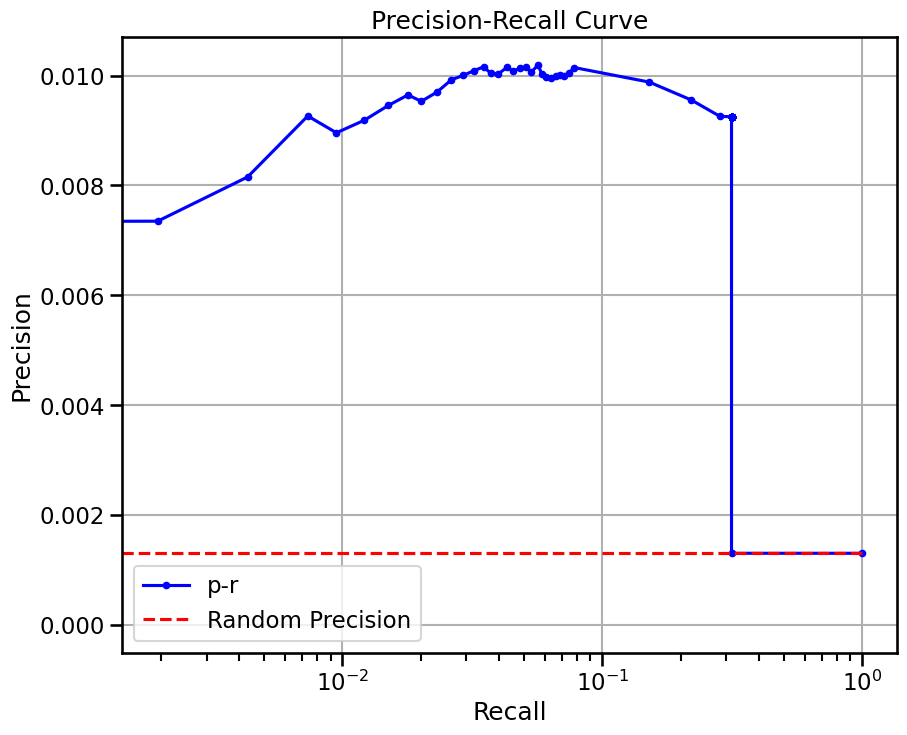

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 35.54 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


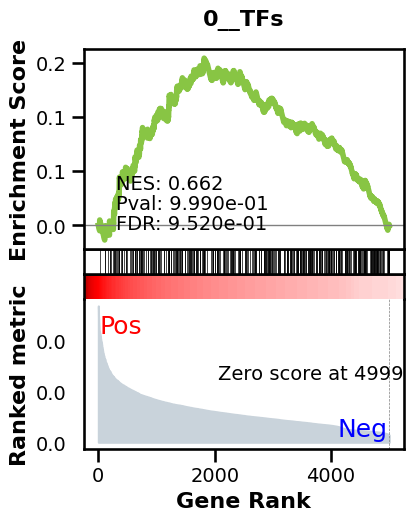

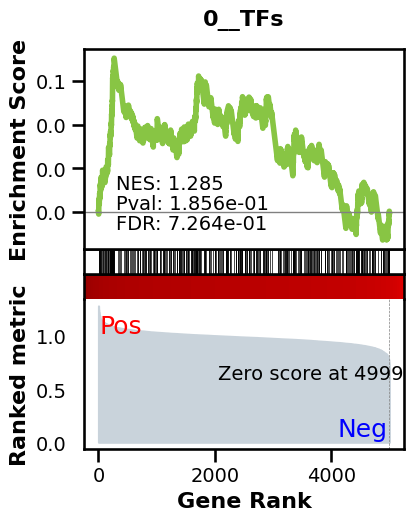

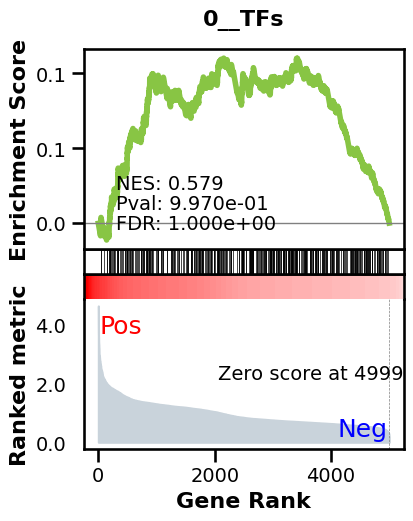

_________________________________________
TF specific enrichment


found some significant results for  7.317073170731708 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3553 genes
intersection pct: 0.7106
precision:  0.0017465889050986179 
recall:  0.09409762324478756 
random precision: 0.0013035393259851465



  0%|          | 0/128 [00:00<?, ?it/s]


  3%|▎         | 4/128 [00:00<00:03, 35.98it/s]


  6%|▋         | 8/128 [00:00<00:03, 35.94it/s]


  9%|▉         | 12/128 [00:00<00:03, 35.97it/s]


 12%|█▎        | 16/128 [00:00<00:03, 35.93it/s]


 16%|█▌        | 20/128 [00:00<00:03, 35.92it/s]


 19%|█▉        | 24/128 [00:00<00:02, 35.95it/s]


 22%|██▏       | 28/128 [00:00<00:02, 35.94it/s]


 25%|██▌       | 32/128 [00:00<00:02, 35.94it/s]


 28%|██▊       | 36/128 [00:01<00:02, 35.99it/s]


 31%|███▏      | 40/128 [00:01<00:02, 35.97it/s]


 34%|███▍      | 44/128 [00:01<00:02, 35.98it/s]


 38%|███▊      | 48/128 [00:01<00:02, 35.96it/s]


 41%|████      | 52/128 [00:01<00:02, 35.94it/s]


 44%|████▍     | 56/128 [00:01<00:02, 35.94it/s]


 47%|████▋     | 60/128 [00:01<00:01, 35.98it/s]


 50%|█████     | 64/128 [00:01<00:01, 36.03it/s]


 53%|█████▎    | 68/128 [00:01<00:01, 36.03it/s]


 56%|█████▋    | 72/128 [00:02<00:01, 36.06it/s]


 59%|█████▉    | 76/128 [00:02<00:01, 35.98it/s]


 62%|██████▎   | 80/128 [00:02<00:01, 36.00it/s]


 66%|██████▌   | 84/128 [00:02<00:01, 35.97it/s]


 69%|██████▉   | 88/128 [00:02<00:01, 35.91it/s]


 72%|███████▏  | 92/128 [00:02<00:01, 35.88it/s]


 75%|███████▌  | 96/128 [00:02<00:00, 35.91it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 35.90it/s]


 81%|████████▏ | 104/128 [00:02<00:00, 35.87it/s]


 84%|████████▍ | 108/128 [00:03<00:00, 35.86it/s]


 88%|████████▊ | 112/128 [00:03<00:00, 35.87it/s]


 91%|█████████ | 116/128 [00:03<00:00, 35.90it/s]


 94%|█████████▍| 120/128 [00:03<00:00, 35.90it/s]


 97%|█████████▋| 124/128 [00:03<00:00, 35.94it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:03<00:00, 35.84it/s]


100%|██████████| 128/128 [00:03<00:00, 35.93it/s]

Average Precision (AP):  0.0013380768638283156
Area Under Precision-Recall Curve (AUPRC):  0.0013246566742881195
EPR: 1.0259722796138613


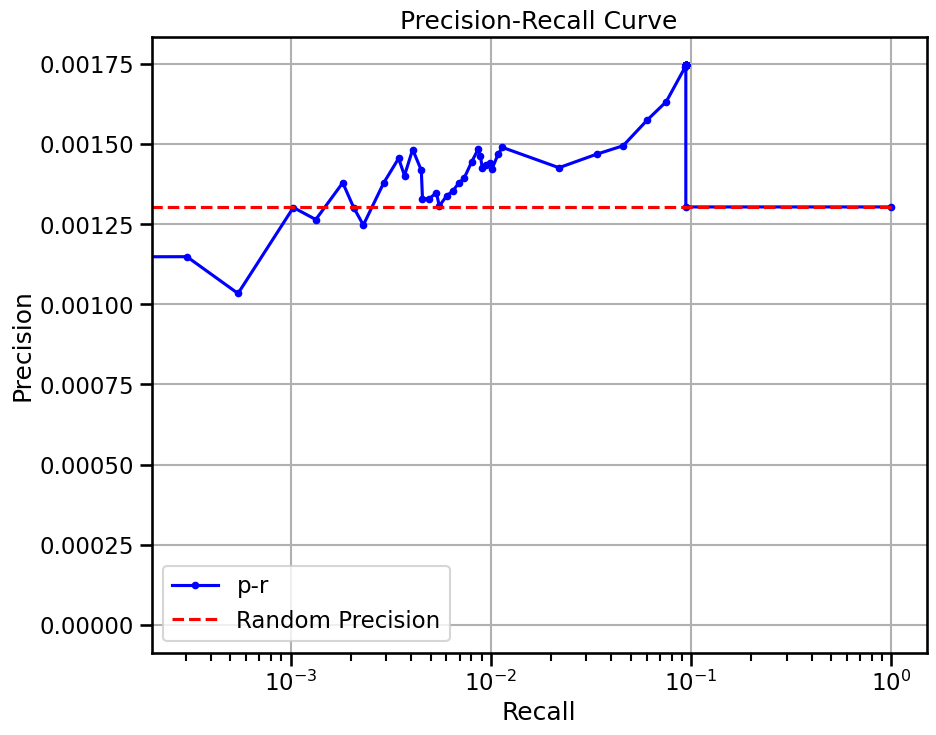

leukocyte (996, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 29.77 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


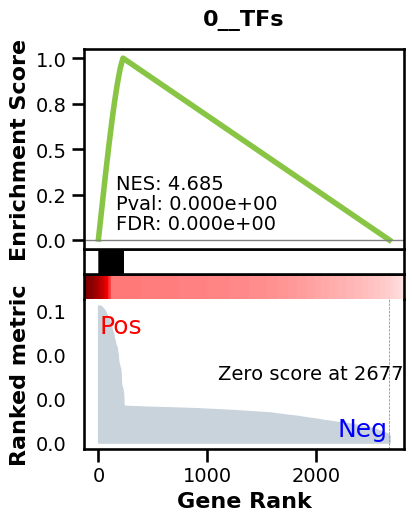

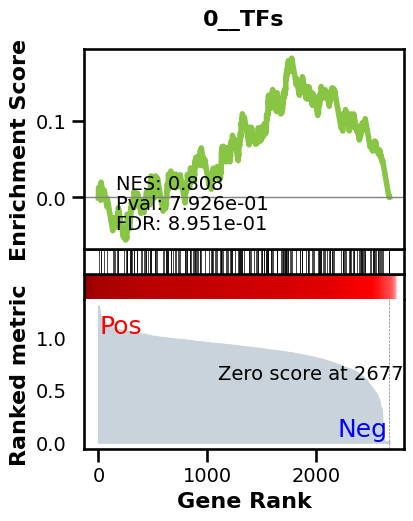

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 1801 genes
intersection pct: 0.6725168035847647
precision:  0.0077406869859700045 
recall:  0.42416340721425466 
random precision: 0.001419581713862669



  0%|          | 0/128 [00:00<?, ?it/s]


 14%|█▍        | 18/128 [00:00<00:00, 176.64it/s]


 28%|██▊       | 36/128 [00:00<00:00, 175.51it/s]


 42%|████▏     | 54/128 [00:00<00:00, 175.72it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 176.04it/s]


 70%|███████   | 90/128 [00:00<00:00, 176.36it/s]


 84%|████████▍ | 108/128 [00:00<00:00, 176.44it/s]


 98%|█████████▊| 126/128 [00:00<00:00, 176.41it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 175.93it/s]

Average Precision (AP):  0.005933007211724707
Area Under Precision-Recall Curve (AUPRC):  0.005562993843089787
EPR: 13.631811427688266


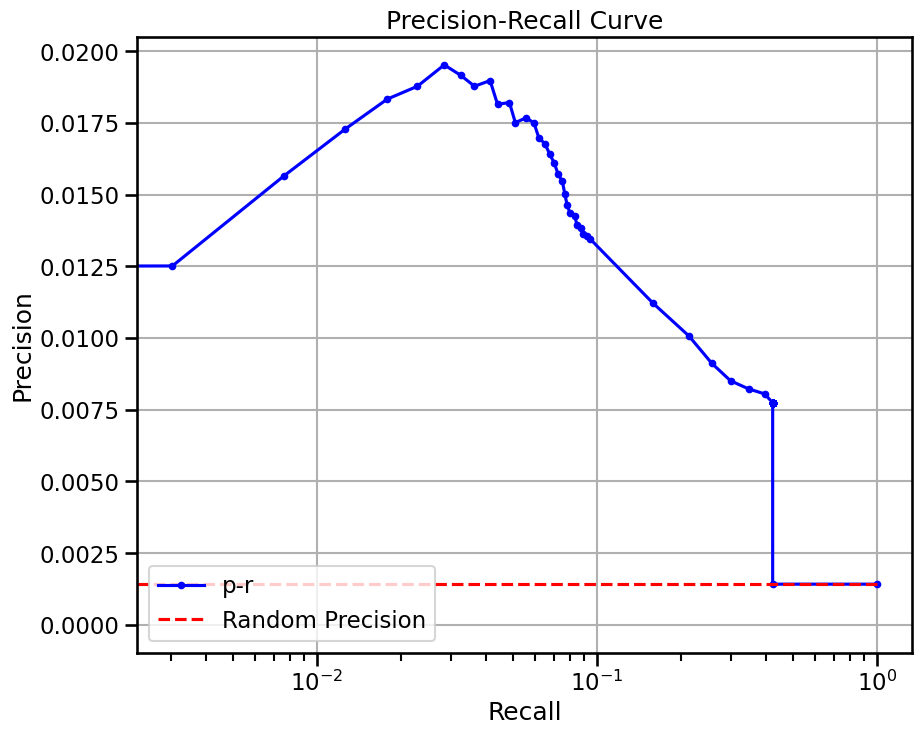

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 36.98 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


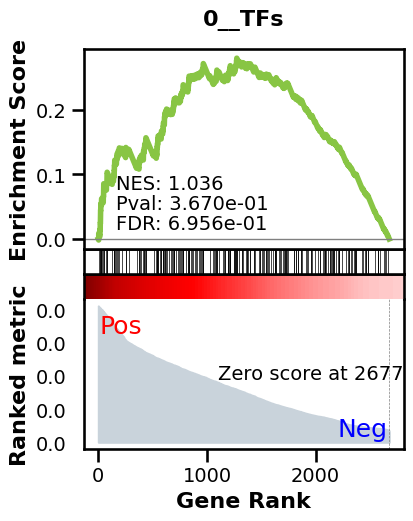

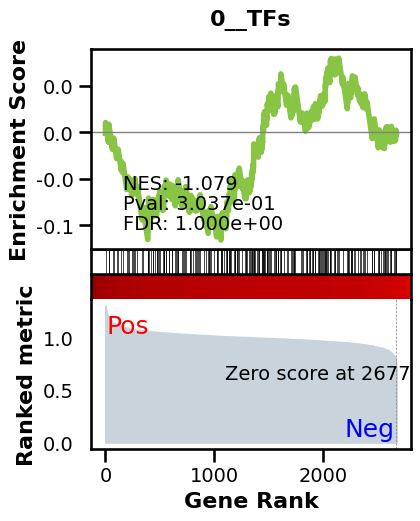

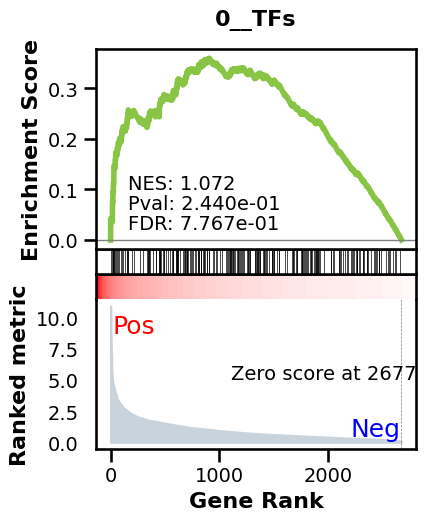

_________________________________________
TF specific enrichment


found some significant results for  5.2631578947368425 % TFs

_________________________________________
loading GT,  omnipath


intersection of 1801 genes
intersection pct: 0.6725168035847647
precision:  0.0018471468404363375 
recall:  0.2853107344632768 
random precision: 0.001419581713862669



  0%|          | 0/128 [00:00<?, ?it/s]


 14%|█▍        | 18/128 [00:00<00:00, 177.32it/s]


 28%|██▊       | 36/128 [00:00<00:00, 177.38it/s]


 42%|████▏     | 54/128 [00:00<00:00, 177.79it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 177.64it/s]


 70%|███████   | 90/128 [00:00<00:00, 177.57it/s]


 84%|████████▍ | 108/128 [00:00<00:00, 177.80it/s]


 98%|█████████▊| 126/128 [00:00<00:00, 177.25it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 177.21it/s]

Average Precision (AP):  0.0016096730243310112
Area Under Precision-Recall Curve (AUPRC):  0.0016326417500215117
EPR: 1.5330242187594847


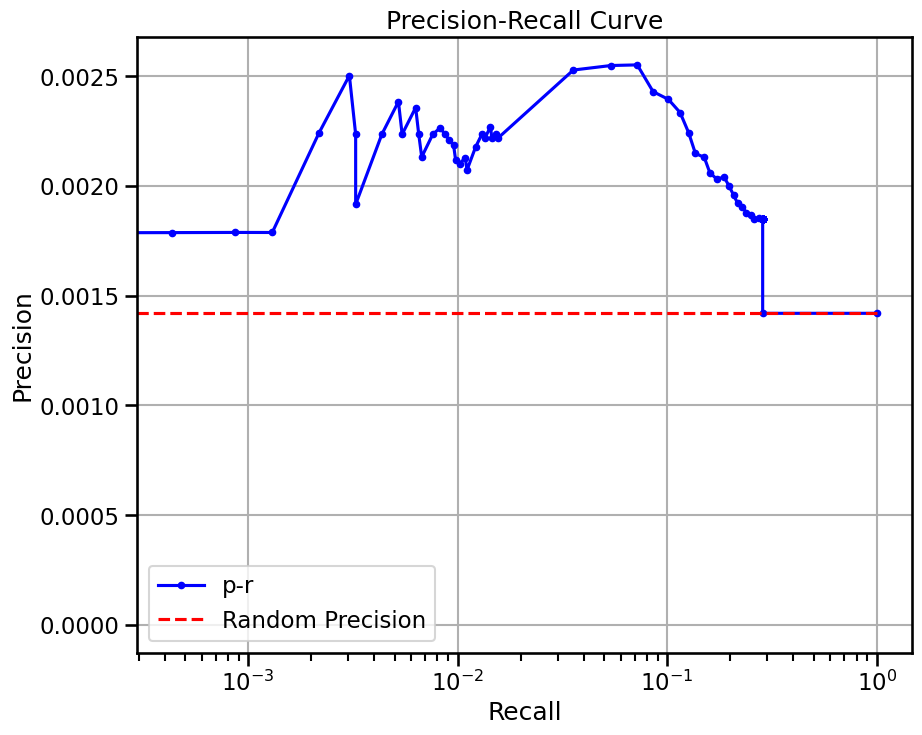

kidney interstitial fibroblast (468, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 39.77 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


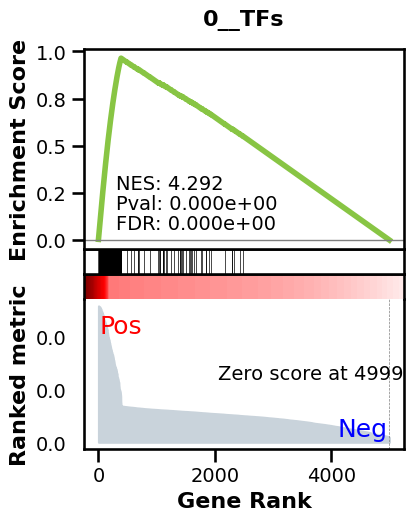

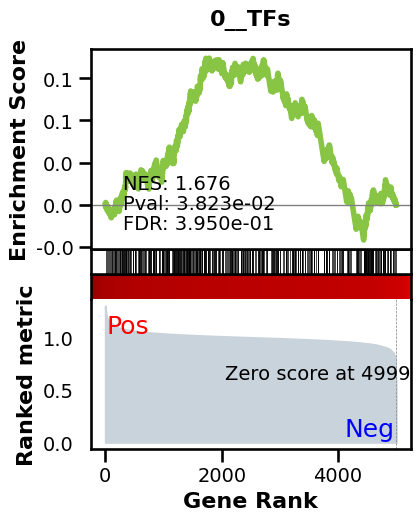

_________________________________________
TF specific enrichment


found some significant results for  10.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3540 genes
intersection pct: 0.708
precision:  0.0087392929605901 
recall:  0.3719953201446501 
random precision: 0.0015009506659450864



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 46.77it/s]


  8%|▊         | 10/128 [00:00<00:02, 46.78it/s]


 12%|█▏        | 15/128 [00:00<00:02, 46.76it/s]


 16%|█▌        | 20/128 [00:00<00:02, 46.74it/s]


 20%|█▉        | 25/128 [00:00<00:02, 46.78it/s]


 23%|██▎       | 30/128 [00:00<00:02, 46.77it/s]


 27%|██▋       | 35/128 [00:00<00:01, 46.78it/s]


 31%|███▏      | 40/128 [00:00<00:01, 46.77it/s]


 35%|███▌      | 45/128 [00:00<00:01, 46.75it/s]


 39%|███▉      | 50/128 [00:01<00:01, 46.75it/s]


 43%|████▎     | 55/128 [00:01<00:01, 46.73it/s]


 47%|████▋     | 60/128 [00:01<00:01, 46.74it/s]


 51%|█████     | 65/128 [00:01<00:01, 46.71it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 46.73it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 46.75it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 46.78it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 46.75it/s]


 70%|███████   | 90/128 [00:01<00:00, 46.74it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 46.71it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 46.74it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 46.75it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 46.72it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 46.72it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 46.75it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 46.75it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 46.74it/s]

Average Precision (AP):  0.005510270172501069
Area Under Precision-Recall Curve (AUPRC):  0.00519690284864094
EPR: 7.660712526772939


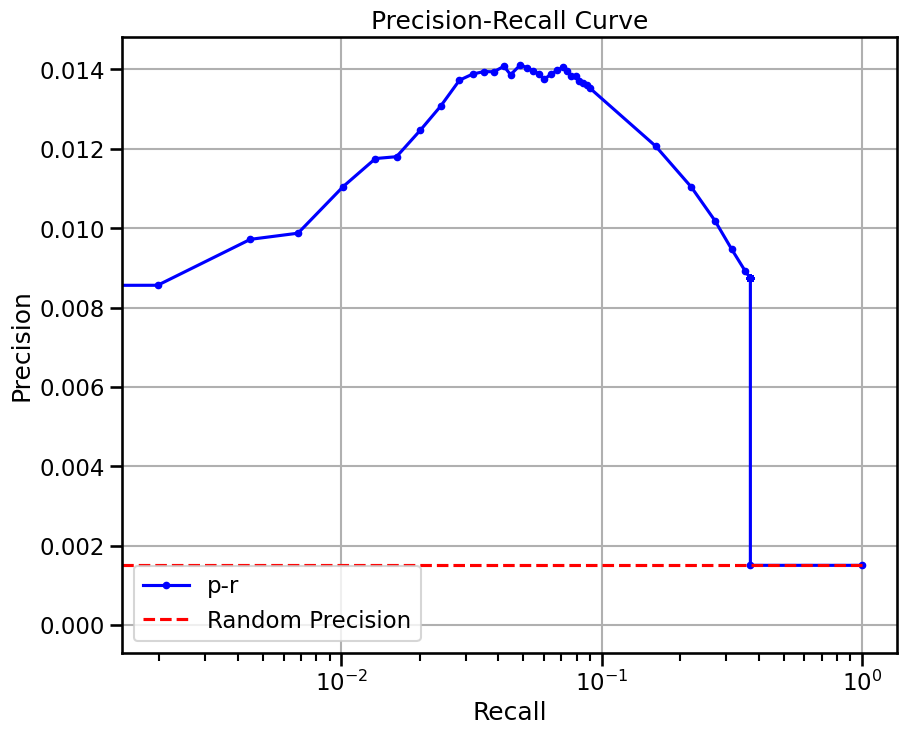

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 57.91 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


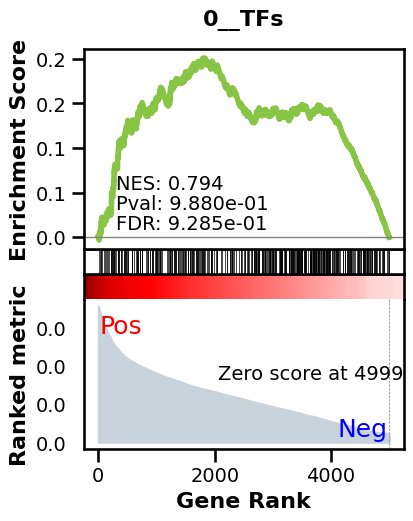

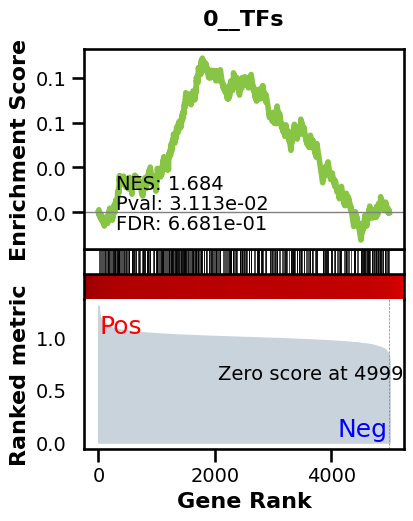

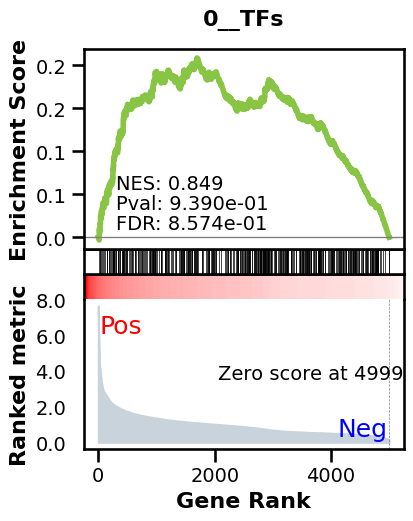

_________________________________________
TF specific enrichment


found some significant results for  2.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3540 genes
intersection pct: 0.708
precision:  0.0022821691284593366 
recall:  0.26824079982982346 
random precision: 0.0015009506659450864



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 44.19it/s]


  8%|▊         | 10/128 [00:00<00:02, 44.23it/s]


 12%|█▏        | 15/128 [00:00<00:02, 44.31it/s]


 16%|█▌        | 20/128 [00:00<00:02, 44.34it/s]


 20%|█▉        | 25/128 [00:00<00:02, 44.32it/s]


 23%|██▎       | 30/128 [00:00<00:02, 44.33it/s]


 27%|██▋       | 35/128 [00:00<00:02, 44.32it/s]


 31%|███▏      | 40/128 [00:00<00:01, 44.32it/s]


 35%|███▌      | 45/128 [00:01<00:01, 44.38it/s]


 39%|███▉      | 50/128 [00:01<00:01, 44.34it/s]


 43%|████▎     | 55/128 [00:01<00:01, 44.37it/s]


 47%|████▋     | 60/128 [00:01<00:01, 44.38it/s]


 51%|█████     | 65/128 [00:01<00:01, 44.35it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 44.31it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 44.24it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 44.30it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 44.33it/s]


 70%|███████   | 90/128 [00:02<00:00, 43.99it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 44.08it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 44.18it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 44.21it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 44.15it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 44.24it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 44.25it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 44.25it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 44.26it/s]

Average Precision (AP):  0.0016661584299541505
Area Under Precision-Recall Curve (AUPRC):  0.0016478209488222017
EPR: 1.0275838489648068


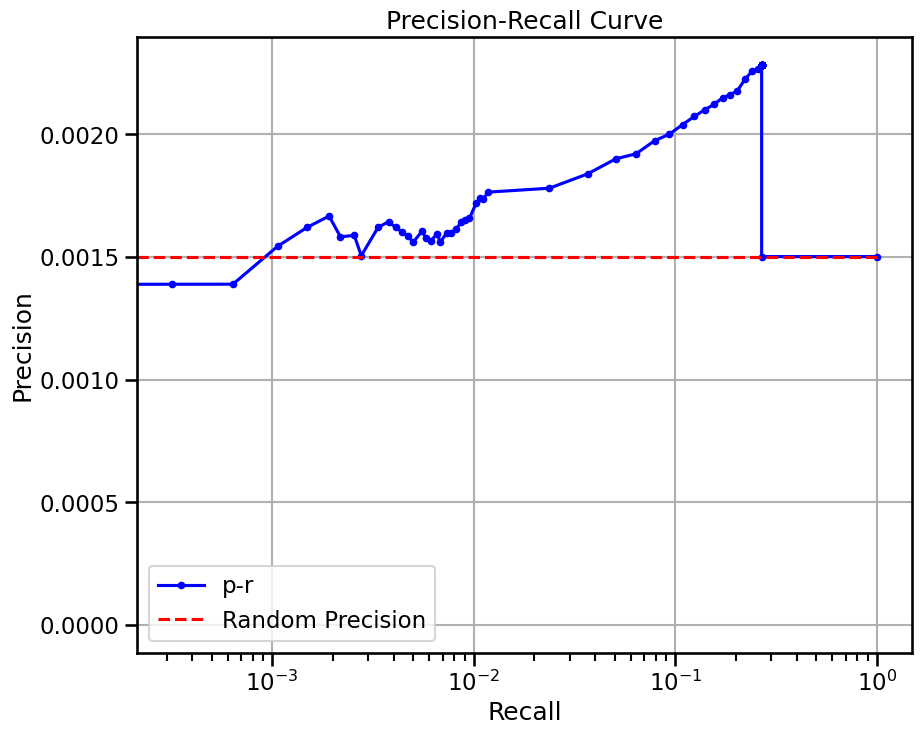

In [8]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
metrics = {}
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS,  adata.var.index.isin(to_use)]
    genie_grn = compute_genie3(
        subadata, nthreads=20, regulators=adata.var[adata.var.isTF].index.tolist())
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    print(celltype, genie_grn.shape)
    metrics['genie3_tf_'+celltype] = BenGRN(genie_grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    genie_grn = compute_genie3(subadata, nthreads=20)
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_'+celltype] = BenGRN(genie_grn,
                                         do_auc=True, doplot=True).scprint_benchmark()

In [9]:
metrics

{'genie3_tf_kidney distal convoluted tubule epithelial cell': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Embryonic stem cells',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Enteric neurons',
   'celltype.gmt__Kupffer cells'],
  'TF_enr': True,
  'enriched_terms_Targets': ['celltype.gmt__Melanocytes'],
  'significant_enriched_TFtargets': 11.764705882352942,
  'precision': 0.004538333462130207,
  'recall': 0.3350622406639004,
  'rand_precision': 0.001062203773751226,
  'auprc': 0.002547500391995076,
  'ap': 0.0028707180369140608,
  'epr': 6.134837743453007},
 'genie3_kidney distal convoluted tubule epithelial cell': {'enriched_terms_Central': ['celltype.gmt__Distal tubule cells',
   'celltype.gmt__-intercalated cells (Collecting duct system)',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Connecting tubule cells',
   'celltype.gmt__Proximal tubule cells',
   'celltype.gmt__Podocytes',
   'celltype.gmt__Ductal cells',
   'celltype.gmt__Hepatic stellate cells'

In [10]:
False
True
True
True
False
True
False
False
True
True
True
True
False
False
False
False
False
True


True

In [11]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

name        EPR     AUPRC  \
0     kidney distal convoluted tubule epithelial cell   6.134838  0.002548   
1     kidney distal convoluted tubule epithelial cell   0.976548  0.001062   
2   kidney loop of Henle thick ascending limb epit...   4.391535  0.003315   
3   kidney loop of Henle thick ascending limb epit...   0.661100  0.001186   
4               kidney collecting duct principal cell   9.568784  0.004856   
5               kidney collecting duct principal cell   1.505049  0.001425   
6                                      mesangial cell   6.082031  0.002756   
7                                      mesangial cell   0.562615  0.001226   
8                     blood vessel smooth muscle cell   6.970178  0.005235   
9                     blood vessel smooth muscle cell   0.789088  0.001801   
10                                           podocyte   6.872768  0.004736   
11                                           podocyte   0.601021  0.001533   
12                                         macrophage   6.912748  0.003929   
13                                         macrophage   1.025972  0.001325   
14                                          leukocyte  13.631811  0.005563   
15                                          leukocyte   1.533024  0.001633   
16                     kidney interstitial fibroblast   7.660713  0.005197   
17                     kidney interstitial fibroblast   1.027584  0.001648   

        RAND    TF_targ  TF_enr  TF_only  
0   0.001062  11.764706    True     True  
1   0.001062   2.941176   False    False  
2   0.001212   0.000000    True     True  
3   0.001212   2.500000   False    False  
4   0.001362   4.285714    True     True  
5   0.001362   2.857143   False    False  
6   0.001223   4.761905    True     True  
7   0.001223   0.000000   False    False  
8   0.001672   5.357143    True     True  
9   0.001672   3.571429   False    False  
10  0.001518   6.382979    True     True  
11  0.001518   6.382979   False    False  
12  0.001304   4.878049    True     True  
13  0.001304   7.317073   False    False  
14  0.001420   0.000000    True     True  
15  0.001420   5.263158   False    False  
16  0.001501  10.000000    True     True  
17  0.001501   2.000000   False    False